# MI Representative Staff Disbursements 

Comparison of all 14 MI House Representative disbursements to representative staffers from FEC funds.

>> # Nature of the Review
>> Rep. Huizenga's campaign committee, Huizenga for Congress ("Campaign Committee"), may have accepted contributions from individuals employed in Rep. Huizenga's congressional office. If Rep. Huizenga failed to ensure that his campaign committee complied with applicable rules, regarding contributions from congressional employees, then he may have violated House rules, standards of conduct, and federal law.  
>> The Campaign Committee reported campaign disbursements that may not be legitimate and verifiable campaign expenditures attributable to bona fide campaign or political purposes. If Rep. Huizenga converted campaign funds from the Campaign Committee to personal use, or if Rep. Huizenga's Campaign Committee expended funds that were not attributable to bona fide campaign or political purposes, then Rep. Huizenga may have violated House rules, standards of conduct, and fedteral law.  
>> # OCE Recommendation  
>> The Board recommended that the Committee further review the above allegation concerning Rep. Huizenga because there is substantial reason to believe that Rep. Huizenga's Campaign Committee accepted contributions from individuals employed in Rep. Huizenga's congressional office.   
>> The Board recommended that the Committee further review the above allegation concerning Rep. Huizenga because tehre[sic] is substantial rea
son to believe that Rep. Huizenga's Campaign Committee reported campaign disbursements that were not legitimate and verifiable campaign expenditures attributable to bona fide campaign or political purposes. 

Source: [OCE Referral Regarding Rep. Bill Huizenga, Nov 14, 2019](https://oce.house.gov/reports/investigations/oce-referral-regarding-rep-bill-huizenga)

### Source Data:

1. [FEC Disbursement Database](https://www.fec.gov/data/disbursements/?data_type=processed&two_year_transaction_period=2020&min_date=01%2F01%2F2019&max_date=12%2F31%2F2020)
2. Staff Listings:
  - [Jack Bergman (MI-1) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=68717)
  - [Bill Huizenga (MI-2) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=135163)
  - [Justin Amash (MI-3) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=80123)
  - [John Moolenaar (MI-4) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=134609)
  - [Dan Kildee (MI-5) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=17560)
  - [Fred Upton (MI-6) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=318)
  - [Tim Walberg (MI-7) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=4679)
  - [Elissa Slotkin (MI-8) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=79580)
  - [Andy Levin (MI-9) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=52487)
  - [Paul Mitchell (MI-10) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=30093)
  - [Haley Stevens (MI-11) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=79589)
  - [Debbie Dingell (MI-12) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=28789)
  - [Rashida Tlaib (MI-13) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=23740)
  - [Brenda Lawrence (MI-14) Staff](http://www.congress.org/congressorg/mlm/congressorg/bio/staff/?id=16226)
  
### Corrections / Issues.

[Please open a ticket for any issues, errors, or omissions](https://github.com/RepBillHuizenga/MI_Rep_Staff_Disbursement_Analysis/issues)

## Data Analysis Setup.

In [7]:
%matplotlib inline
from __init import *
from lookup import Congressman

Generate pretty plots for printing.

In [8]:
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib#comment87590438_41717533
sns.set(
    rc={
        "axes.labelsize": 12,
        "axes.titlesize": 18,
        "figure.figsize": (11, 8.5),
        "figure.dpi": 300,
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
    }
)

Read all of the Michigan disbursement data & reps data.

In [9]:
df = pd.read_csv(
    filepath_or_buffer="mi_rep_all_disbursement_data.csv.gz",
    compression="gzip",
    header=0,
)
# Load all representative data. 
reps = lookup.savepoint()
# Get MI Reps.
mi = [rep for rep in reps if rep.state_abbr == "MI"]
mi_reps = [rep for rep in mi if rep.house]
mi_senate = [rep for rep in mi if rep.senate]

# Find all Campain Staff Disbursements

Look through each Michigan rep and their staffers and find disbursements.

In [10]:
df2=pd.DataFrame()
for rep in mi_reps:
    for staffer in rep.staffers2.keys():
        staffer_name = HumanName(staffer)
        df_ = df[
            df.recipient_name.str.contains(",") &
            df.recipient_name.str.contains(staffer_name.first.upper()) &
            df.recipient_name.str.contains(staffer_name.last.upper()) &
            df.committee_name.str.contains(rep.last_name.upper())
        ]
        # If the staffer recieved any disbursements.
        if len(df_)>0:
            # Get the total and round to cents. Otherwise floating point numbers do weird things.
            total = np.round(df_.disbursement_amount.sum(), 2)
            print(f"{rep.state_abbr}-{rep.district}\t{rep.name}: {staffer_name}, {len(df_)} disbursements: ${total}")
            df2 = df2.append(
                other=df_,
                verify_integrity=True,
            )
df2.reset_index(inplace=True)

MI-1	Jack Bergman: Amelia Burns, 24 disbursements: $20437.85
MI-2	Bill Huizenga: Jon DeWitte, 20 disbursements: $63183.79
MI-2	Bill Huizenga: Palmer Rafferty, 1 disbursements: $201.84
MI-2	Bill Huizenga: Brian Patrick, 82 disbursements: $60439.51
MI-2	Bill Huizenga: Marliss McManus, 17 disbursements: $16006.86
MI-2	Bill Huizenga: Phil Rokus, 2 disbursements: $1747.13
MI-2	Bill Huizenga: Matt Kooiman, 117 disbursements: $67254.43
MI-3	Justin Amash: Poppy Nelson, 20 disbursements: $37685.17
MI-3	Justin Amash: Matt Weibel, 13 disbursements: $40748.25
MI-4	John Moolenaar: David Russell, 2 disbursements: $468.53
MI-4	John Moolenaar: Cliff Burdick, 5 disbursements: $208.73
MI-4	John Moolenaar: Chris MacArthur, 31 disbursements: $34539.73
MI-4	John Moolenaar: Ashton Bortz, 49 disbursements: $9334.05
MI-5	Dan Kildee: Mitchell Rivard, 11 disbursements: $6623.1
MI-5	Dan Kildee: Ghada Alkiek, 37 disbursements: $110091.43
MI-7	Tim Walberg: Stephen Rajzer, 57 disbursements: $98924.43
MI-8	Elissa Sl

# Representative Staffer Disbursements

Count and Sum total of disbursements to representative staffers. Sorted by disbursement sum.

In [112]:
_ = df2.groupby("committee_name").agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by=[("disbursement_sum")], inplace=True)
_

disbursement_count  disbursement_sum
committee_name                                                   
DEBBIE DINGELL FOR CONGRESS                   8           1557.72
ANDY LEVIN FOR CONGRESS                      10          12482.15
BERGMANFORCONGRESS                           24          20437.85
HALEY STEVENS FOR CONGRESS                   19          26460.09
MOOLENAAR FOR CONGRESS                       87          44551.04
JUSTIN AMASH FOR CONGRESS                    33          78433.42
WALBERG FOR CONGRESS                         57          98924.43
FRIENDS OF DAN KILDEE                        48         116714.53
RASHIDA TLAIB FOR CONGRESS                   37         128657.15
ELISSA SLOTKIN FOR CONGRESS                  98         160194.87
HUIZENGA FOR CONGRESS                       239         208833.56

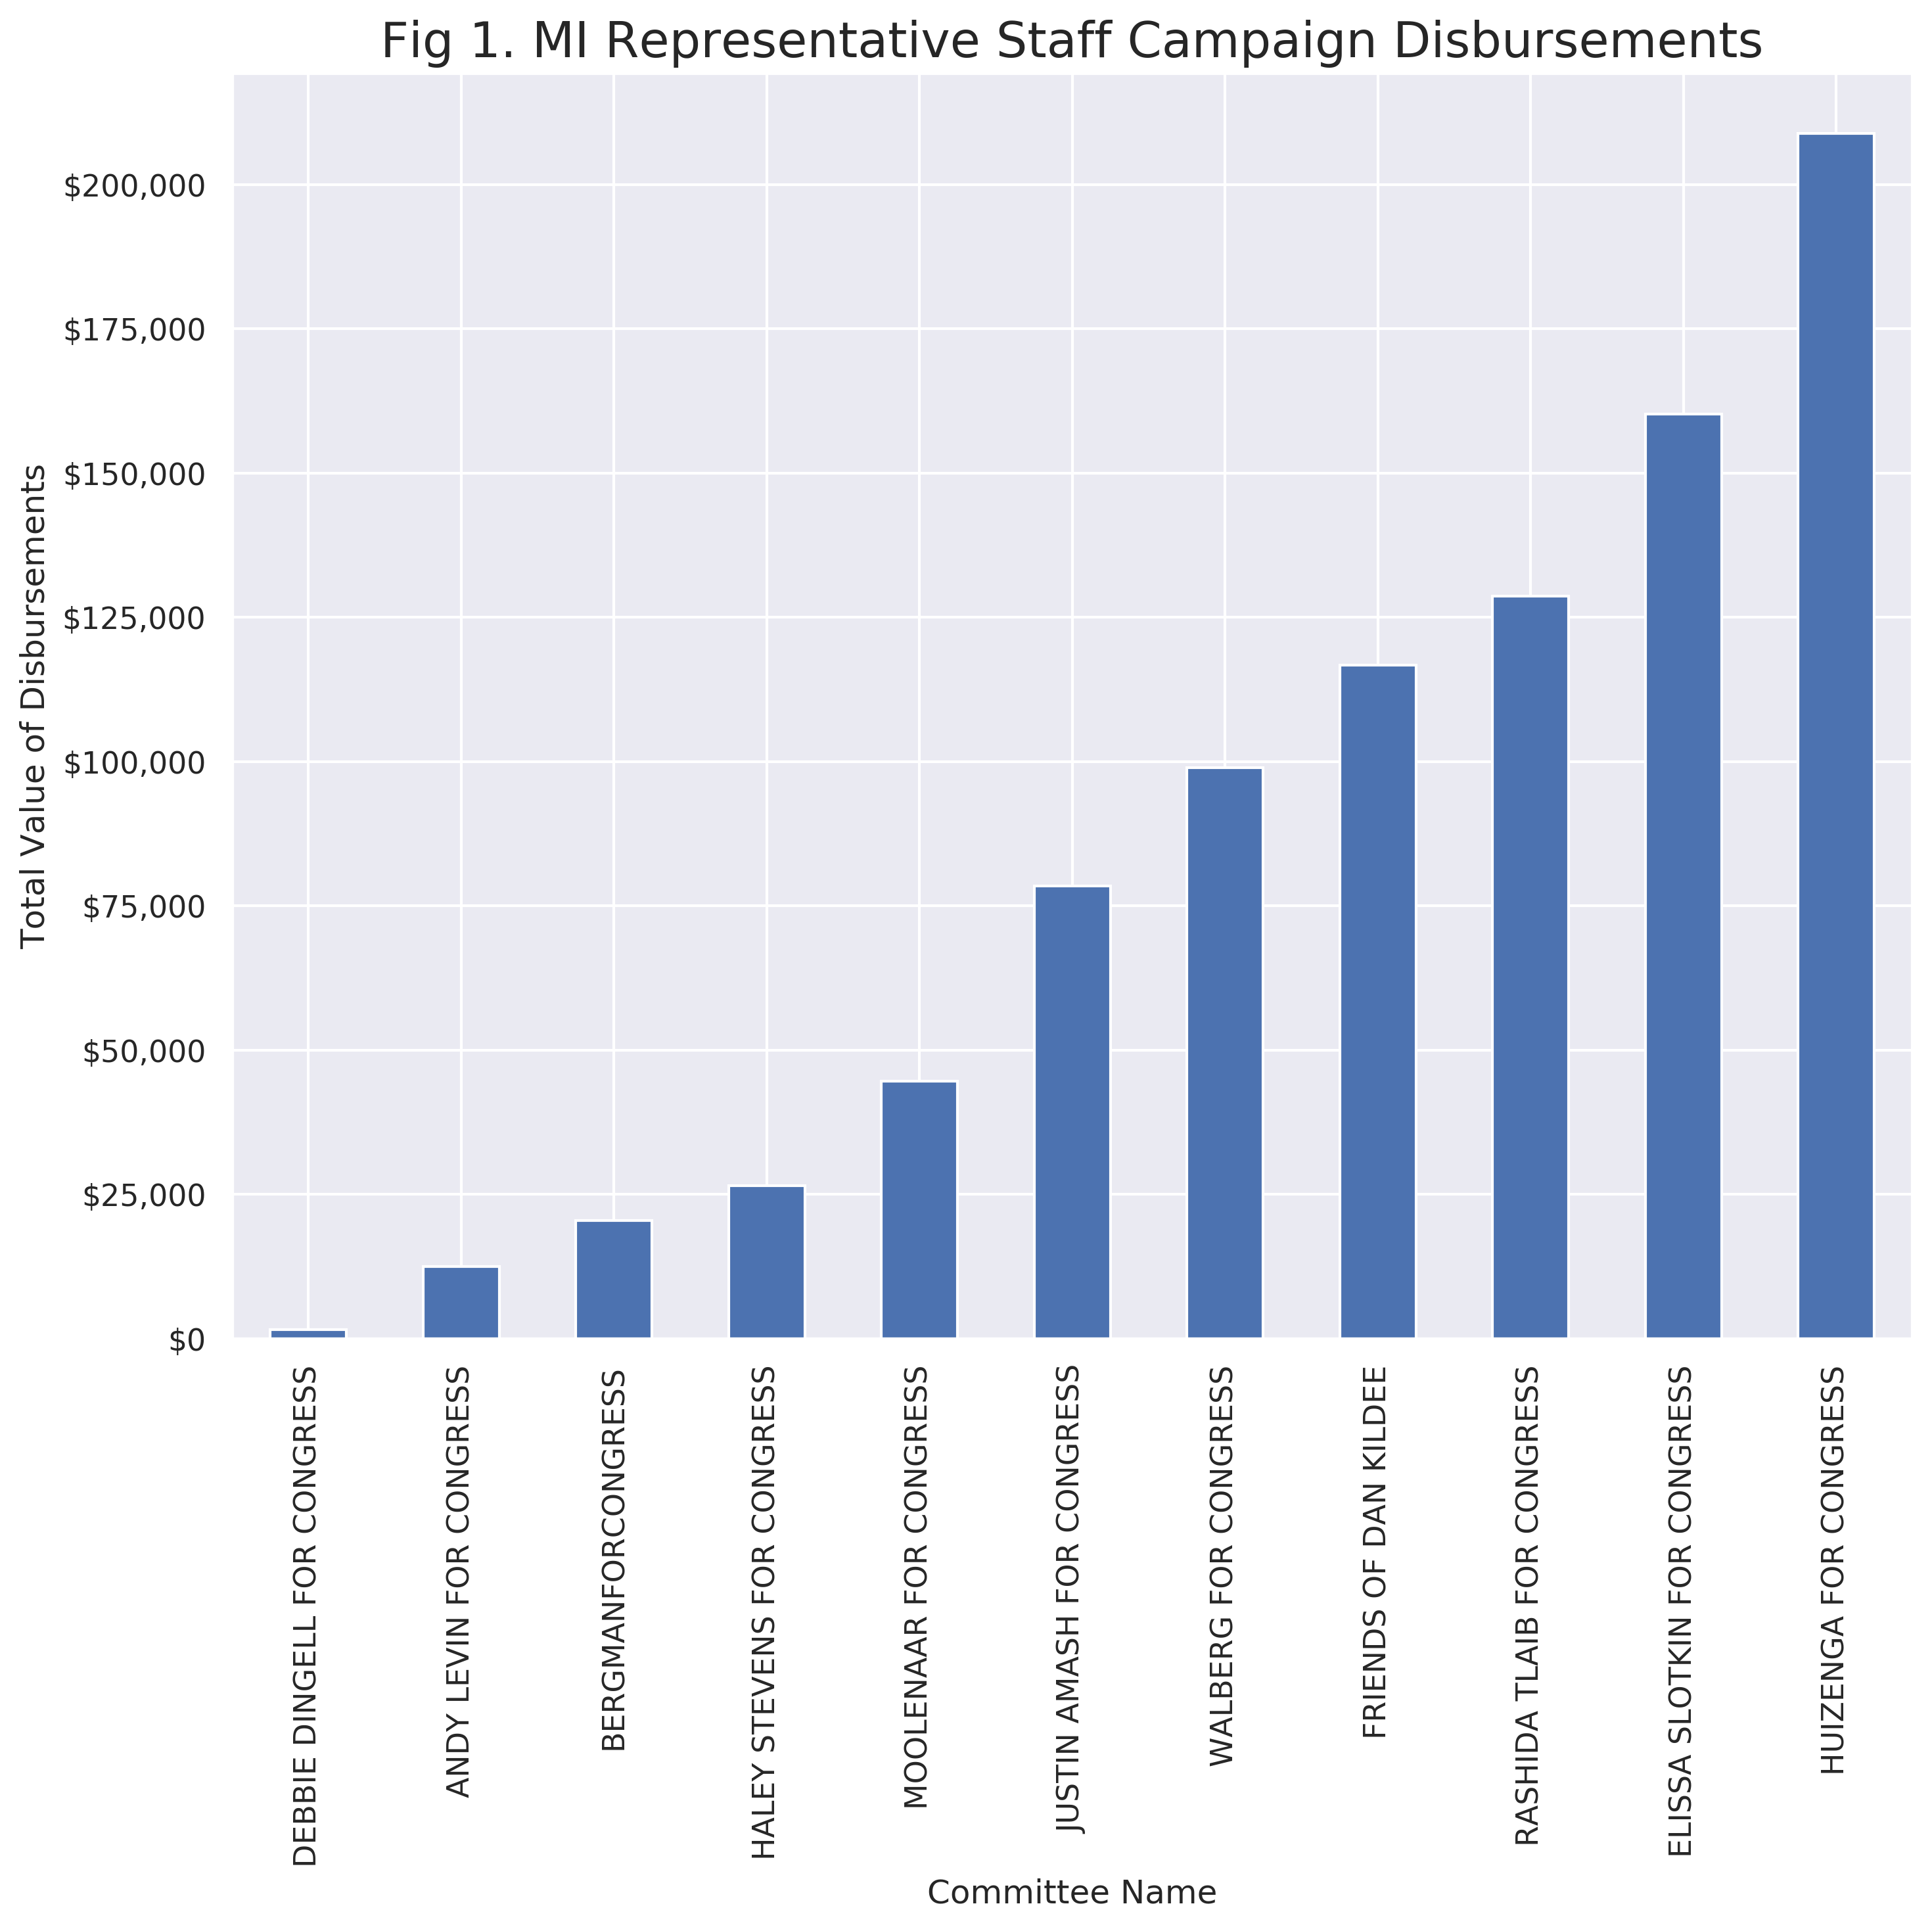

In [113]:
ax = _["disbursement_sum"].plot(kind='bar')
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no=1
title = f"Fig {fig_no}. MI Representative Staff Campaign Disbursements"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Staffer Disbursements Grouped by Committee Name.

In [114]:
_ = df2.groupby(['committee_name','recipient_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              recipient_name                                 
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                             9   
                            HERZIG, WALTER C.                          1   
BERGMANFORCONGRESS          BURNS, AMELIA                             24   
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                            7   
                            TEBAY, KELLY                               1   
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                            4   
                            CAALSKONOS, FRANCESCA                     14   
                            GIRELLI, AUSTIN                           12   
                            LINDOW, HANNAH                            24   
                            NORMAN, MELA LOUISE                       44   
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                             37   
                            RIVARD, MITCHELL                          11   
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                              10   
                            MCCARREN, BLAKE                            6   
                            POBUR, COLLEEN                             3   
HUIZENGA FOR CONGRESS       BROWDER MCMANUS, MARLISS                   2   
                            DEWITTE, JON                               7   
                            DEWITTE, JON MR.                          13   
                            KOOIMAN, MATT                            106   
                            KOOIMAN, MATT MR.                          4   
                            KOOIMAN-, MATT                             7   
                            MCMANUS, MARLISS                          15   
                            PATRICK, BRIAN                            71   
                            PATRICK-, BRIAN                           11   
                            RAFFERTY, PALMER                           1   
                            ROKUS, PHILIP                              2   
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY                             20   
                            WEIBEL, MATTHEW                           13   
MOOLENAAR FOR CONGRESS      BORTZ, ASHTON                              3   
                            BORTZ, ASHTON M. MS.                       6   
                            BORTZ, ASHTON MS.                         40   
                            BURDICK, CLIFF                             5   
                            MACARTHUR, CHRISTOPHER                    31   
                            RUSSELL, DAVID MR.                         2   
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                            14   
                            GODDEERIS, ANDREW                         23   
WALBERG FOR CONGRESS        RAJZER, STEPHEN                           54   
                            RAJZER, STEPHEN MR                         3   

                                                      disbursement_sum  
committee_name              recipient_name                              
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                    12414.19  
                            HERZIG, WALTER C.                    67.96  
BERGMANFORCONGRESS          BURNS, AMELIA                     20437.85  
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                    1150.10  
                            TEBAY, KELLY                        407.62  
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                    2768.60  
                            CAALSKONOS, FRANCESCA              6948.29  
                            GIRELLI, AUSTIN                   13544.37  
                            LINDOW, HANNAH                    27621.20  
                            NORMAN, MELA LOUISE              109312.41  
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                    110091.43  
                            RIVARD, MITCHELL                   6

## [Name Normalization Sidebar]

Before further analysis, normalize the recipient names.

For what ever reason, Huizenga has the most 'variety' in recipient names. Making it annoying to aggregate results.

For example:

    DEWITTE, JON                 18653.56
    DEWITTE, JON MR.             44530.23
    
"```Mr.```" splits Jon's disbursements into two. Hanlon's razor?

In [116]:
def norm_name(recipient_name):
    # Normalize dashes added to Brian Patrick & Matt Kooiman's names.
    recipient_name = recipient_name.replace("-", "")
    # Normalize MCMANUS, MARLISS's married name.
    recipient_name = recipient_name.replace("BROWDER ", "")
    # Use HumanName to strip out titles.
    hn = HumanName(recipient_name)
    return f'{hn["last"]}, {hn["first"]}'
df2["recipient"] = df2.recipient_name.apply(norm_name)

## Staffer Disbursements Grouped by Committee Name, Deux

In [117]:
_ = df2.groupby(["committee_name", "recipient"]).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              recipient                                    
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                           9   
                            HERZIG, WALTER                           1   
BERGMANFORCONGRESS          BURNS, AMELIA                           24   
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                          7   
                            TEBAY, KELLY                             1   
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                          4   
                            CAALSKONOS, FRANCESCA                   14   
                            GIRELLI, AUSTIN                         12   
                            LINDOW, HANNAH                          24   
                            NORMAN, MELA                            44   
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                           37   
                            RIVARD, MITCHELL                        11   
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                            10   
                            MCCARREN, BLAKE                          6   
                            POBUR, COLLEEN                           3   
HUIZENGA FOR CONGRESS       DEWITTE, JON                            20   
                            KOOIMAN, MATT                          117   
                            MCMANUS, MARLISS                        17   
                            PATRICK, BRIAN                          82   
                            RAFFERTY, PALMER                         1   
                            ROKUS, PHILIP                            2   
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY                           20   
                            WEIBEL, MATTHEW                         13   
MOOLENAAR FOR CONGRESS      BORTZ, ASHTON                           49   
                            BURDICK, CLIFF                           5   
                            MACARTHUR, CHRISTOPHER                  31   
                            RUSSELL, DAVID                           2   
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                          14   
                            GODDEERIS, ANDREW                       23   
WALBERG FOR CONGRESS        RAJZER, STEPHEN                         57   

                                                    disbursement_sum  
committee_name              recipient                                 
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                  12414.19  
                            HERZIG, WALTER                     67.96  
BERGMANFORCONGRESS          BURNS, AMELIA                   20437.85  
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                  1150.10  
                            TEBAY, KELLY                      407.62  
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                  2768.60  
                            CAALSKONOS, FRANCESCA            6948.29  
                            GIRELLI, AUSTIN                 13544.37  
                            LINDOW, HANNAH                  27621.20  
                            NORMAN, MELA                   109312.41  
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                  110091.43  
                            RIVARD, MITCHELL                 6623.10  
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                    11897.34  
                            MCCARREN, BLAKE                 12203.64  
                            POBUR, COLLEEN                   2359.11  
HUIZENGA FOR CONGRESS       DEWITTE, JON                    63183.79  
                            KOOIMAN, MATT                   67254.43  
                            MCMANUS, MARLISS                16006.86  
                            PATRICK, BRIAN                  60439.51  
                            RAFFERTY, PALMER                  201.84  
                            ROKUS, PHILIP                    1747.13  
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY         

## Staffer Disbursements Sorted by Number of Disbursements.

In [118]:
_.sort_values(by=[("disbursement_count")])

disbursement_count  \
committee_name              recipient                                    
ANDY LEVIN FOR CONGRESS     HERZIG, WALTER                           1   
DEBBIE DINGELL FOR CONGRESS TEBAY, KELLY                             1   
HUIZENGA FOR CONGRESS       RAFFERTY, PALMER                         1   
MOOLENAAR FOR CONGRESS      RUSSELL, DAVID                           2   
HUIZENGA FOR CONGRESS       ROKUS, PHILIP                            2   
HALEY STEVENS FOR CONGRESS  POBUR, COLLEEN                           3   
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                          4   
MOOLENAAR FOR CONGRESS      BURDICK, CLIFF                           5   
HALEY STEVENS FOR CONGRESS  MCCARREN, BLAKE                          6   
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                          7   
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                           9   
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                            10   
FRIENDS OF DAN KILDEE       RIVARD, MITCHELL                        11   
ELISSA SLOTKIN FOR CONGRESS GIRELLI, AUSTIN                         12   
JUSTIN AMASH FOR CONGRESS   WEIBEL, MATTHEW                         13   
ELISSA SLOTKIN FOR CONGRESS CAALSKONOS, FRANCESCA                   14   
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                          14   
HUIZENGA FOR CONGRESS       MCMANUS, MARLISS                        17   
                            DEWITTE, JON                            20   
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY                           20   
RASHIDA TLAIB FOR CONGRESS  GODDEERIS, ANDREW                       23   
ELISSA SLOTKIN FOR CONGRESS LINDOW, HANNAH                          24   
BERGMANFORCONGRESS          BURNS, AMELIA                           24   
MOOLENAAR FOR CONGRESS      MACARTHUR, CHRISTOPHER                  31   
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                           37   
ELISSA SLOTKIN FOR CONGRESS NORMAN, MELA                            44   
MOOLENAAR FOR CONGRESS      BORTZ, ASHTON                           49   
WALBERG FOR CONGRESS        RAJZER, STEPHEN                         57   
HUIZENGA FOR CONGRESS       PATRICK, BRIAN                          82   
                            KOOIMAN, MATT                          117   

                                                    disbursement_sum  
committee_name              recipient                                 
ANDY LEVIN FOR CONGRESS     HERZIG, WALTER                     67.96  
DEBBIE DINGELL FOR CONGRESS TEBAY, KELLY                      407.62  
HUIZENGA FOR CONGRESS       RAFFERTY, PALMER                  201.84  
MOOLENAAR FOR CONGRESS      RUSSELL, DAVID                    468.53  
HUIZENGA FOR CONGRESS       ROKUS, PHILIP                    1747.13  
HALEY STEVENS FOR CONGRESS  POBUR, COLLEEN                   2359.11  
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                  2768.60  
MOOLENAAR FOR CONGRESS      BURDICK, CLIFF                    208.73  
HALEY STEVENS FOR CONGRESS  MCCARREN, BLAKE                 12203.64  
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                  1150.10  
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                  12414.19  
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                    11897.34  
FRIENDS OF DAN KILDEE       RIVARD, MITCHELL                 6623.10  
ELISSA SLOTKIN FOR CONGRESS GIRELLI, AUSTIN                 13544.37  
JUSTIN AMASH FOR CONGRESS   WEIBEL, MATTHEW                 40748.25  
ELISSA SLOTKIN FOR CONGRESS CAALSKONOS, FRANCESCA            6948.29  
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                  34469.04  
HUIZENGA FOR CONGRESS       MCMANUS, MARLISS                16006.86  
                            DEWITTE, JON                    63183.79  
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY                   37685.17  
RASHIDA TLAIB FOR CONGRESS  GODDEERIS, ANDREW               94188.11  
ELISSA SLOTKIN FOR CONGRESS LINDOW, HANNAH        

## Staffer Disbursements Sorted by Value of Disbursements.

In [119]:
_.sort_values(by=[("disbursement_sum")])

disbursement_count  \
committee_name              recipient                                    
ANDY LEVIN FOR CONGRESS     HERZIG, WALTER                           1   
HUIZENGA FOR CONGRESS       RAFFERTY, PALMER                         1   
MOOLENAAR FOR CONGRESS      BURDICK, CLIFF                           5   
DEBBIE DINGELL FOR CONGRESS TEBAY, KELLY                             1   
MOOLENAAR FOR CONGRESS      RUSSELL, DAVID                           2   
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                          7   
HUIZENGA FOR CONGRESS       ROKUS, PHILIP                            2   
HALEY STEVENS FOR CONGRESS  POBUR, COLLEEN                           3   
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                          4   
FRIENDS OF DAN KILDEE       RIVARD, MITCHELL                        11   
ELISSA SLOTKIN FOR CONGRESS CAALSKONOS, FRANCESCA                   14   
MOOLENAAR FOR CONGRESS      BORTZ, ASHTON                           49   
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                            10   
                            MCCARREN, BLAKE                          6   
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                           9   
ELISSA SLOTKIN FOR CONGRESS GIRELLI, AUSTIN                         12   
HUIZENGA FOR CONGRESS       MCMANUS, MARLISS                        17   
BERGMANFORCONGRESS          BURNS, AMELIA                           24   
ELISSA SLOTKIN FOR CONGRESS LINDOW, HANNAH                          24   
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                          14   
MOOLENAAR FOR CONGRESS      MACARTHUR, CHRISTOPHER                  31   
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY                           20   
                            WEIBEL, MATTHEW                         13   
HUIZENGA FOR CONGRESS       PATRICK, BRIAN                          82   
                            DEWITTE, JON                            20   
                            KOOIMAN, MATT                          117   
RASHIDA TLAIB FOR CONGRESS  GODDEERIS, ANDREW                       23   
WALBERG FOR CONGRESS        RAJZER, STEPHEN                         57   
ELISSA SLOTKIN FOR CONGRESS NORMAN, MELA                            44   
FRIENDS OF DAN KILDEE       ALKIEK, GHADA                           37   

                                                    disbursement_sum  
committee_name              recipient                                 
ANDY LEVIN FOR CONGRESS     HERZIG, WALTER                     67.96  
HUIZENGA FOR CONGRESS       RAFFERTY, PALMER                  201.84  
MOOLENAAR FOR CONGRESS      BURDICK, CLIFF                    208.73  
DEBBIE DINGELL FOR CONGRESS TEBAY, KELLY                      407.62  
MOOLENAAR FOR CONGRESS      RUSSELL, DAVID                    468.53  
DEBBIE DINGELL FOR CONGRESS DOLLHOPF, KEVIN                  1150.10  
HUIZENGA FOR CONGRESS       ROKUS, PHILIP                    1747.13  
HALEY STEVENS FOR CONGRESS  POBUR, COLLEEN                   2359.11  
ELISSA SLOTKIN FOR CONGRESS BIRLESON, MEGAN                  2768.60  
FRIENDS OF DAN KILDEE       RIVARD, MITCHELL                 6623.10  
ELISSA SLOTKIN FOR CONGRESS CAALSKONOS, FRANCESCA            6948.29  
MOOLENAAR FOR CONGRESS      BORTZ, ASHTON                    9334.05  
HALEY STEVENS FOR CONGRESS  MARTIN, JOHN                    11897.34  
                            MCCARREN, BLAKE                 12203.64  
ANDY LEVIN FOR CONGRESS     ALAWIEH, ABBAS                  12414.19  
ELISSA SLOTKIN FOR CONGRESS GIRELLI, AUSTIN                 13544.37  
HUIZENGA FOR CONGRESS       MCMANUS, MARLISS                16006.86  
BERGMANFORCONGRESS          BURNS, AMELIA                   20437.85  
ELISSA SLOTKIN FOR CONGRESS LINDOW, HANNAH                  27621.20  
RASHIDA TLAIB FOR CONGRESS  ANDERSON, RYAN                  34469.04  
MOOLENAAR FOR CONGRESS      MACARTHUR, CHRISTOPHER          34539.73  
JUSTIN AMASH FOR CONGRESS   NELSON, POPPY         

## Staffer Disbursements Grouped by Committee Name & Disbursement Description

In [120]:
_ = df2.groupby(['committee_name','disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              disbursement_description                                                 
ANDY LEVIN FOR CONGRESS     EVENT SUPPLIES                                                       1   
                            OFFICE SUPPLY REIMBURSEMENT                                          1   
                            PAYROLL                                                              8   
BERGMANFORCONGRESS          CAMPAIGN CONSULTING                                                  1   
                            FIELD CONSULTING                                                     6   
                            NO ITEMIZATION NECESSARY                                             1   
                            POSTAGE REIMBURSEMENT                                                3   
                            SEE BELOW                                                            2   
                            SEE MEMO ENTRIES                                                     5   
                            SEE MEMO ENTRY                                                       4   
                            STRATEGY CONSULTING                                                  2   
DEBBIE DINGELL FOR CONGRESS REIMBURSEMENT                                                        1   
                            TRAVEL REIMBURSEMENT - OFFICIALLY CONNECTED                          7   
ELISSA SLOTKIN FOR CONGRESS MILEAGE REIMBURSEMENT                                                6   
                            PAYROL                                                               1   
                            PAYROLL                                                             83   
                            REIMBURSEMENT                                                        4   
                            REIMBURSEMENT (VENDORS OVER $200 AGGREGATE BELOW)                    2   
                            REIMBURSEMENT (VENDORS THAT AGGREGATE OVER $200...                   1   
                            REIMBURSEMENT (VENDORS THAT AGGREGATE OVER $200...                   1   
FRIENDS OF DAN KILDEE       ADVANCE FOR PURCHASE OF FOOD FOR FUNDRAISER                          1   
                            CAR RENTAL                                                           1   
                            CONTRACT CONSULTING                                                  2   
                            CONTRACT PROFESSIONAL SERVICES                                       1   
                            EXPENSE REIMBURSEMENT                                                2   
                            FOOD FOR OFFICE OPEN HOUSE                                           1   
                            FUEL REIMBURSEMENT FOR CAMPAIGN APPEARANCES                          1   
                            FUNDRAISER SUPPLIES                                                  1   
                            FUNDRAISING CONSULTING                                              14   
                            FUNDRAISING EMPLOYEE                                                 1   
                            OFFICE SUPPLY REIMBURSEMENT                                          1   
                            PAYROLL                                                             15   
                            PAYROLL EXPENSES                                                     1   
                            REFUND FROM ACTBLUE                                                  1   
                            REIMBURSEMENT FOR PRINTING EXPENSE                                   1   
                            SOCIAL MEDIA CONSULTING                                              1   
                            SUPPLIES                                                             1   
                            TRAVEL EXPENSE REIMBURSEMENT                                         2   


# Payroll vs Non-Payroll Staff Disbursements

As shown in ```Fig 1.```, Huizenga's staff disbursements is inline (but still higher) with disbursements taken by other Michigan representative staffers. However all other campaigns have considerable spending for salary/payroll.

For the purposes of this analysis "Salary" & "Payroll" are synonymous.

In [121]:
# Determine if a disbursement 
def ispayroll(disbursement_description):
    if "SALARY" in disbursement_description:
        return "Payroll"
    # Edgecase for a typo.
    if "PAYROL" in disbursement_description:
        return "Payroll"
    return "Non-Payroll"
# Force disbursement_description to a string. 
df2["disbursement_description"] = df2.disbursement_description.apply(str)
# Add payroll column.
df2["payroll"] = df2.disbursement_description.apply(ispayroll)

## Payroll vs Non Payroll Staff Disbursements, Grouped by Committee Name

In [122]:
_ = df2.groupby(['committee_name', "payroll"]).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  disbursement_sum
committee_name              payroll                                          
ANDY LEVIN FOR CONGRESS     Non-Payroll                   2            279.96
                            Payroll                       8          12202.19
BERGMANFORCONGRESS          Non-Payroll                  24          20437.85
DEBBIE DINGELL FOR CONGRESS Non-Payroll                   8           1557.72
ELISSA SLOTKIN FOR CONGRESS Non-Payroll                  14           4513.47
                            Payroll                      84         155681.40
FRIENDS OF DAN KILDEE       Non-Payroll                  32          56441.12
                            Payroll                      16          60273.41
HALEY STEVENS FOR CONGRESS  Non-Payroll                   3           2359.11
                            Payroll                      16          24100.98
HUIZENGA FOR CONGRESS       Non-Payroll                 225         198822.96
                            Payroll                      14          10010.60
JUSTIN AMASH FOR CONGRESS   Non-Payroll                  22          51145.92
                            Payroll                      11          27287.50
MOOLENAAR FOR CONGRESS      Non-Payroll                  87          44551.04
RASHIDA TLAIB FOR CONGRESS  Non-Payroll                  12          28044.65
                            Payroll                      25         100612.50
WALBERG FOR CONGRESS        Non-Payroll                  37          14229.88
                            Payroll                      20          84694.55

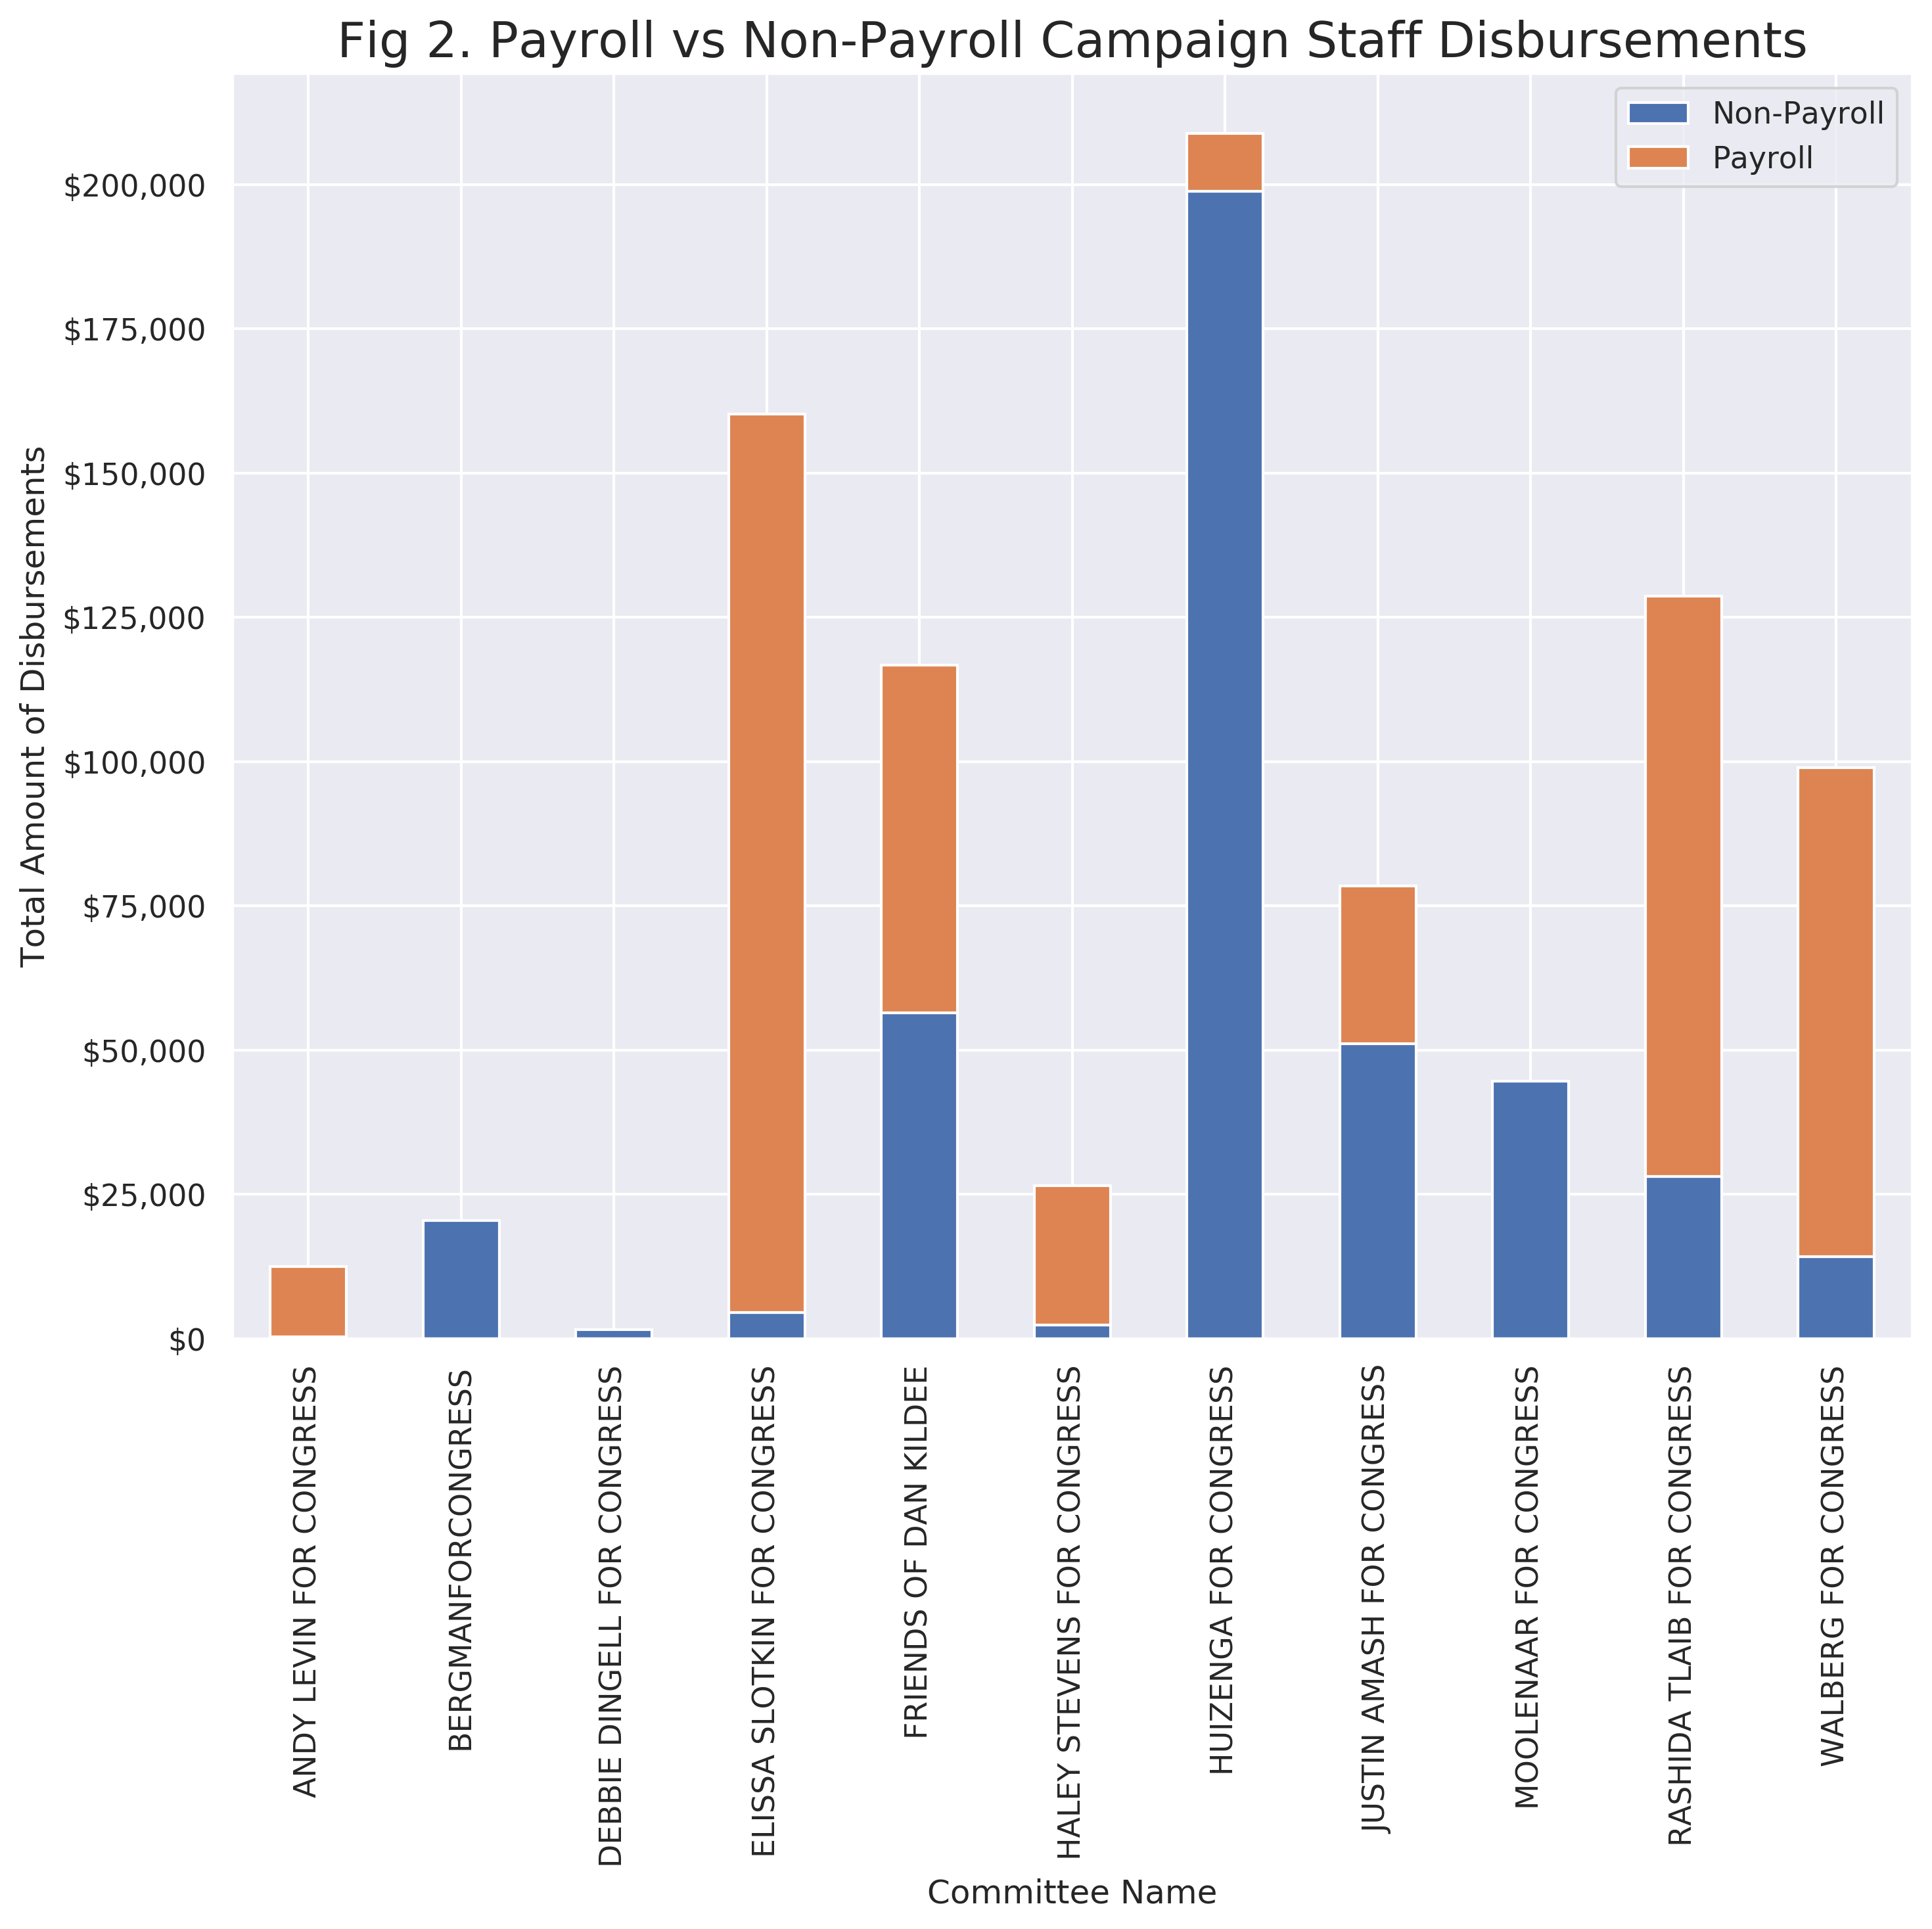

In [123]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Amount of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
plt.legend(bbox_to_anchor=(1, 1))
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Payroll vs Non-Payroll Campaign Staff Disbursements"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Committee Staff Disbursements Grouped by Payroll vs Non-Payroll

In [124]:
_ = df2.groupby(["payroll", 'committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by=["payroll", "disbursement_sum"], inplace=True)
_

disbursement_count  disbursement_sum
payroll     committee_name                                                   
Non-Payroll ANDY LEVIN FOR CONGRESS                       2            279.96
            DEBBIE DINGELL FOR CONGRESS                   8           1557.72
            HALEY STEVENS FOR CONGRESS                    3           2359.11
            ELISSA SLOTKIN FOR CONGRESS                  14           4513.47
            WALBERG FOR CONGRESS                         37          14229.88
            BERGMANFORCONGRESS                           24          20437.85
            RASHIDA TLAIB FOR CONGRESS                   12          28044.65
            MOOLENAAR FOR CONGRESS                       87          44551.04
            JUSTIN AMASH FOR CONGRESS                    22          51145.92
            FRIENDS OF DAN KILDEE                        32          56441.12
            HUIZENGA FOR CONGRESS                       225         198822.96
Payroll     HUIZENGA FOR CONGRESS                        14          10010.60
            ANDY LEVIN FOR CONGRESS                       8          12202.19
            HALEY STEVENS FOR CONGRESS                   16          24100.98
            JUSTIN AMASH FOR CONGRESS                    11          27287.50
            FRIENDS OF DAN KILDEE                        16          60273.41
            WALBERG FOR CONGRESS                         20          84694.55
            RASHIDA TLAIB FOR CONGRESS                   25         100612.50
            ELISSA SLOTKIN FOR CONGRESS                  84         155681.40

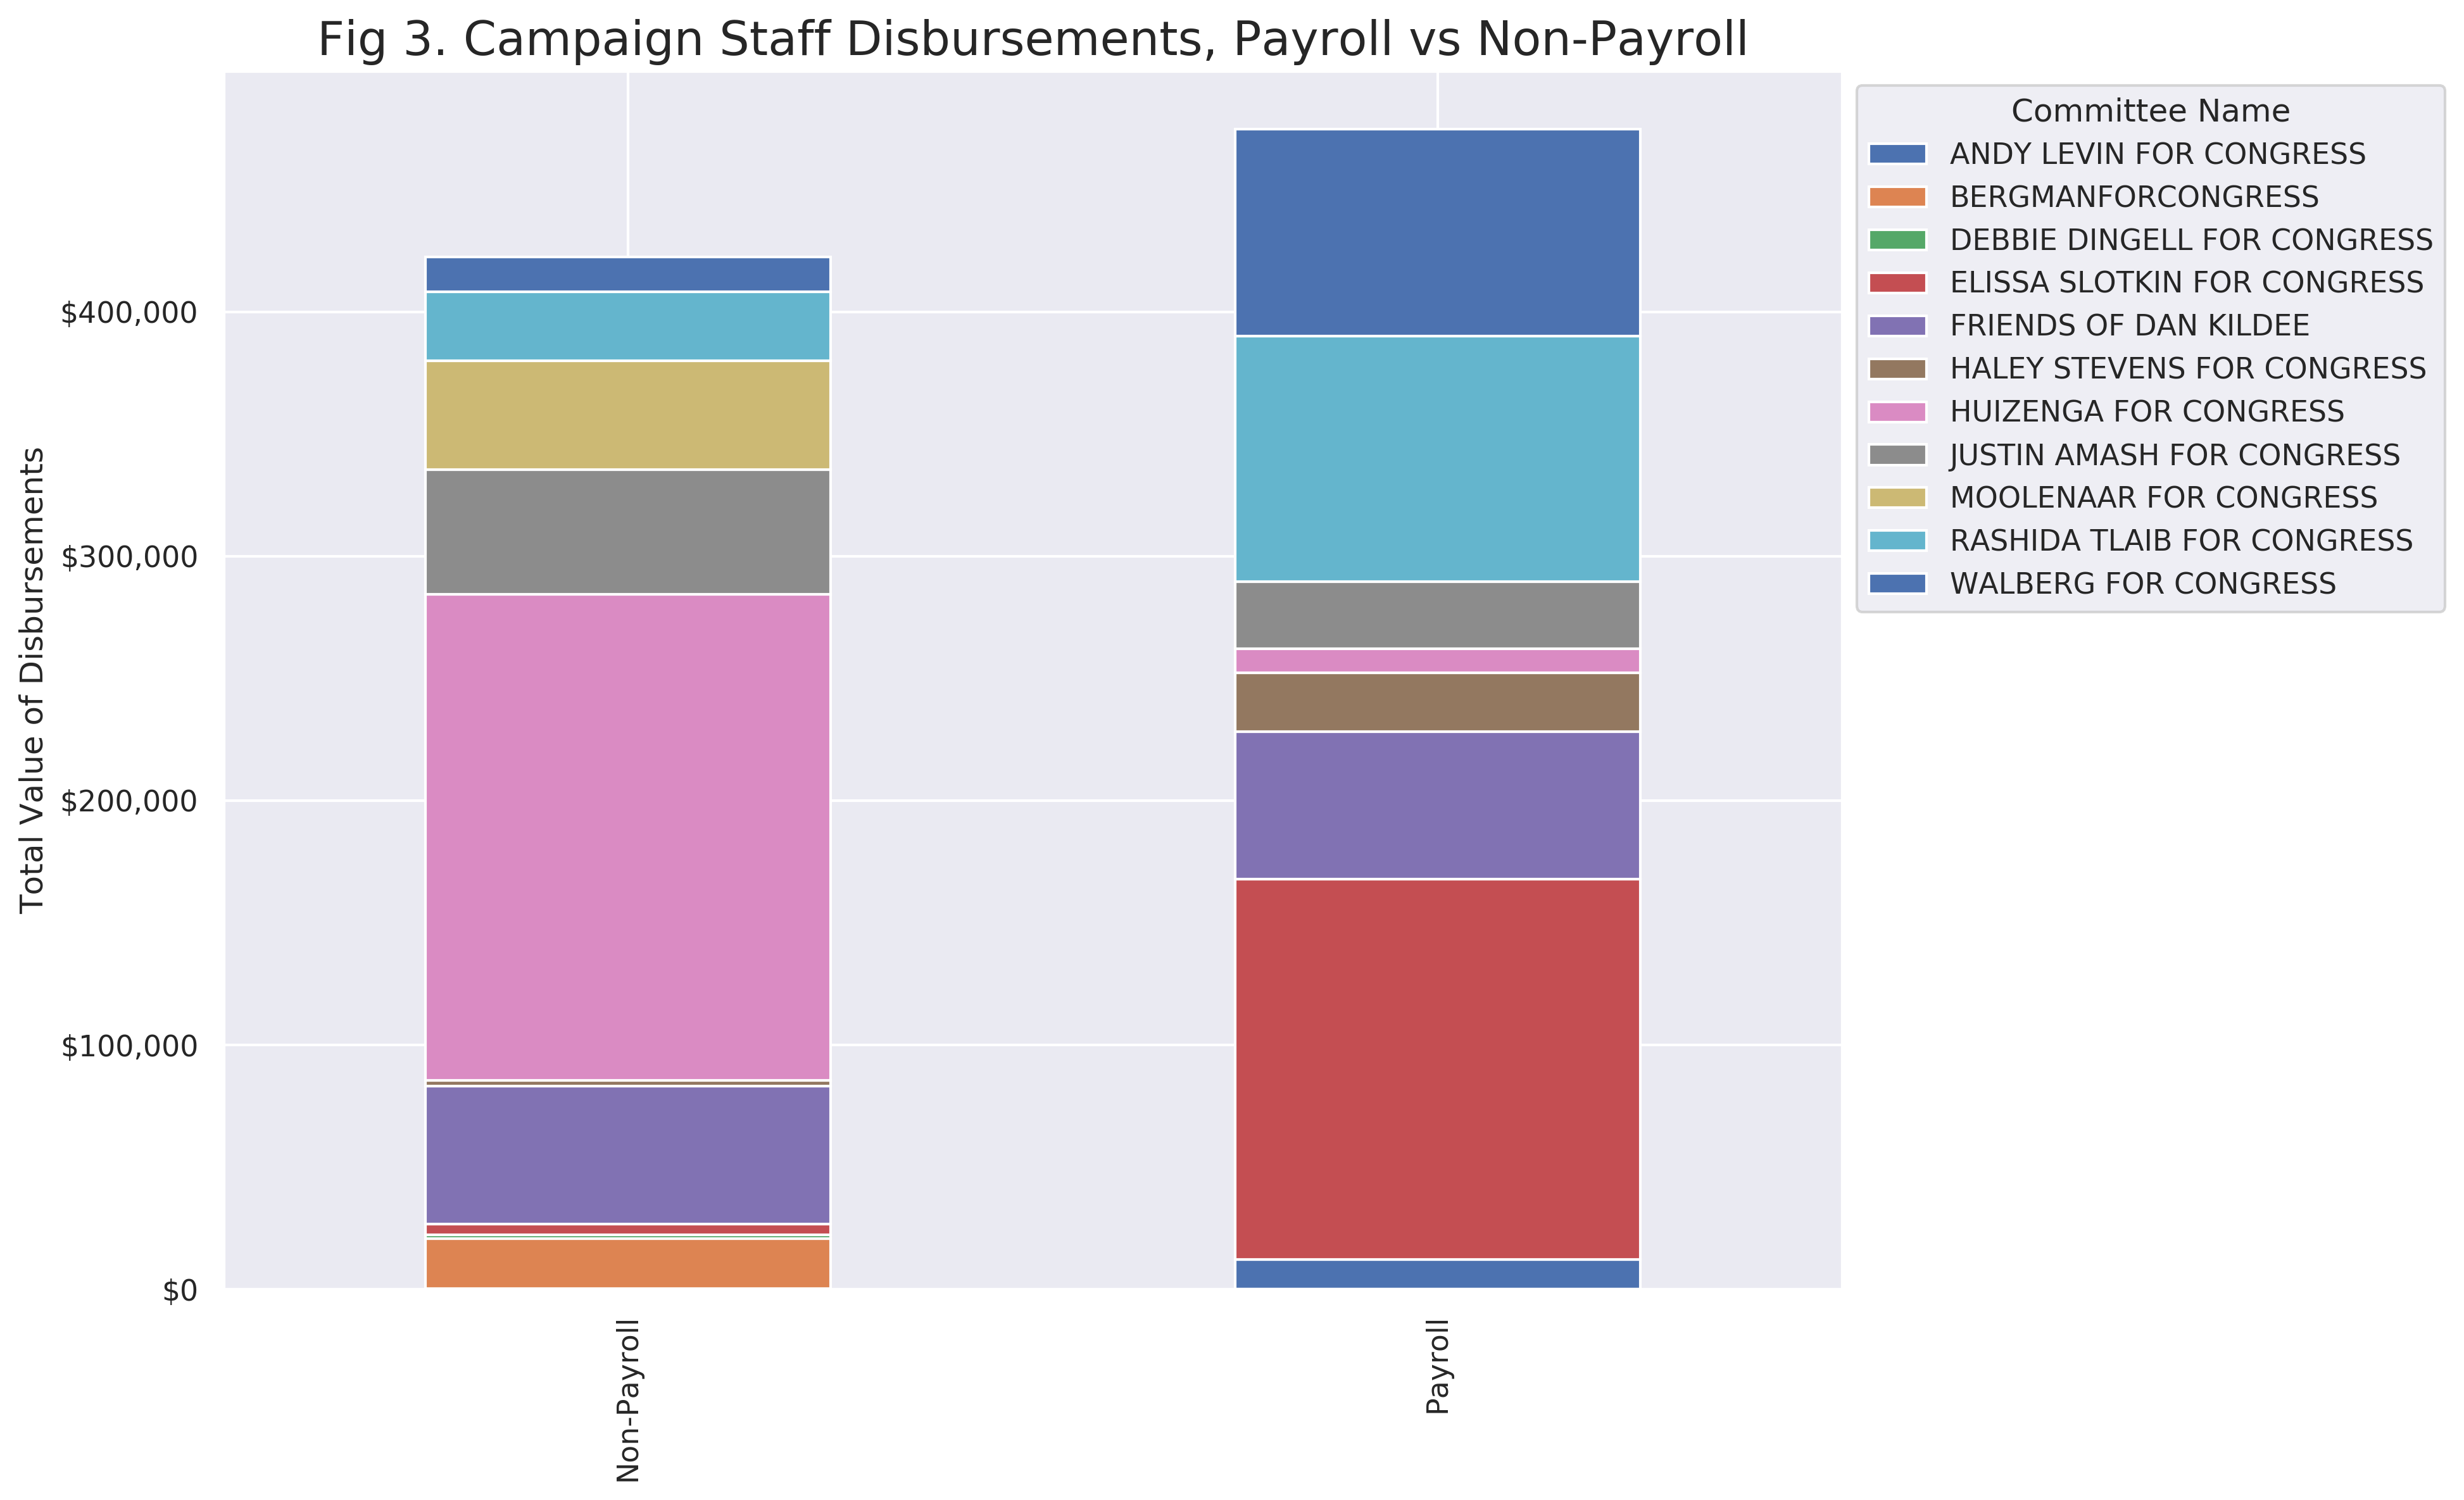

In [125]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Campaign Staff Disbursements, Payroll vs Non-Payroll"
plt.title(title)
plt.legend(title="Committee Name", loc='bottom left', bbox_to_anchor=(1.0, 1))
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

# Non-Payroll Disbursements

Looking into just disbursements made to legislative staff that were **not** for payroll purposes.

Review No. 19-2187:

> II: REP. HUIZENGA’S CAMPAIGN COMMITTEE MAY HAVE ACCEPTED CONTRIBUTIONS FROM CONGRESSIONAL STAFFERS
>> A. Applicable Law, Rules, and Standards of Conduct 
>>> 16. House Ethics Manual
>>>> “The definition of the term contribution in the FECA is quite detailed . . . **[U]nder FEC
regulations, most outlays that an individual makes on behalf of a campaign are deemed to be a
contribution to that campaign from that individual. This is so even if it is intended that the
campaign will reimburse the individual promptly.** The major exception to this rule is for
outlays that an individual makes to cover expenses that he or she incurs in traveling on behalf of
a campaign.” 10 Assuming certain travel outlays are reimbursed within specified time periods,
they will not be considered “contributions.”

## Non-Payroll Disbursements by Committee.

Sorted by disbursement total.

In [126]:
non_payroll_df = df2[df2.payroll == "Non-Payroll"]
_ = non_payroll_df.groupby(['committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  disbursement_sum
committee_name                                                   
ANDY LEVIN FOR CONGRESS                       2            279.96
DEBBIE DINGELL FOR CONGRESS                   8           1557.72
HALEY STEVENS FOR CONGRESS                    3           2359.11
ELISSA SLOTKIN FOR CONGRESS                  14           4513.47
WALBERG FOR CONGRESS                         37          14229.88
BERGMANFORCONGRESS                           24          20437.85
RASHIDA TLAIB FOR CONGRESS                   12          28044.65
MOOLENAAR FOR CONGRESS                       87          44551.04
JUSTIN AMASH FOR CONGRESS                    22          51145.92
FRIENDS OF DAN KILDEE                        32          56441.12
HUIZENGA FOR CONGRESS                       225         198822.96

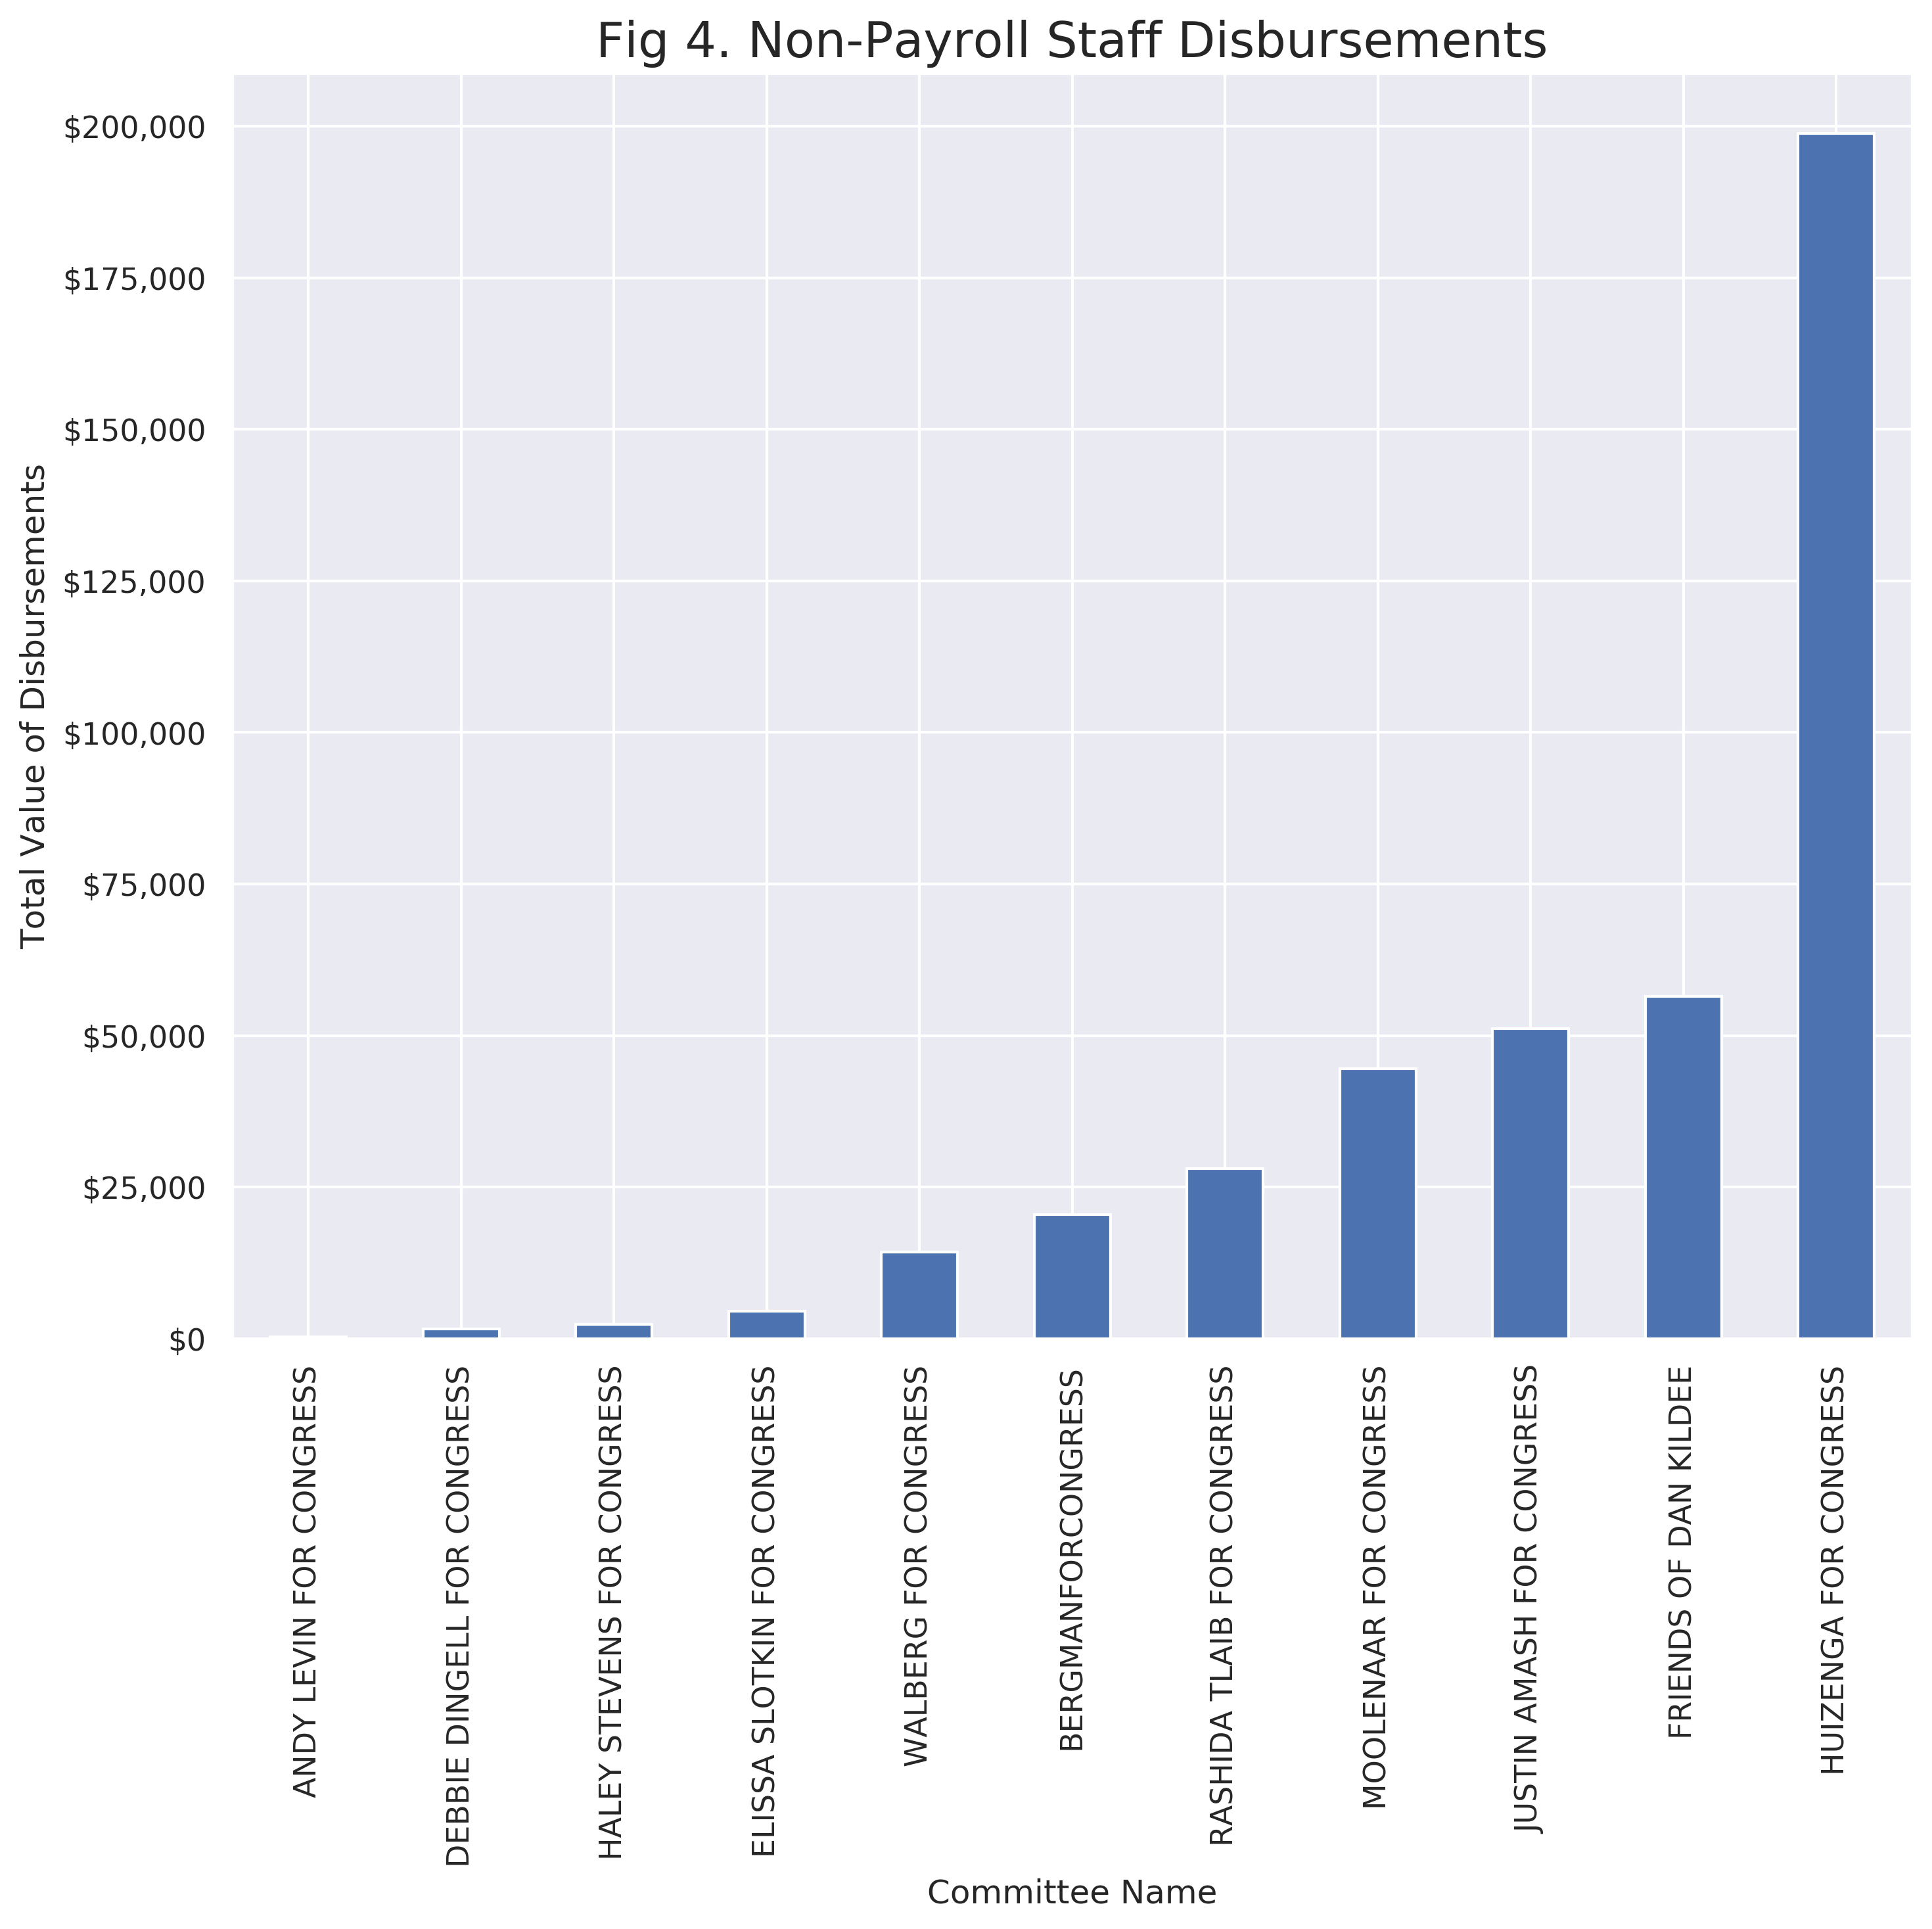

In [127]:
ax = _["disbursement_sum"].plot(kind="bar")
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Non-Payroll Staff Disbursements"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Non-Payroll Disbursements by Recipient

Sorted by total disbursement sum.  

In [128]:
_ = non_payroll_df.groupby(['recipient', 'committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  \
recipient              committee_name                                    
HERZIG, WALTER         ANDY LEVIN FOR CONGRESS                       1   
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                         1   
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                        5   
ALAWIEH, ABBAS         ANDY LEVIN FOR CONGRESS                       1   
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS                   3   
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS                   2   
TEBAY, KELLY           DEBBIE DINGELL FOR CONGRESS                   1   
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                        2   
DOLLHOPF, KEVIN        DEBBIE DINGELL FOR CONGRESS                   7   
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                         2   
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS                   4   
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS                   5   
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS                    3   
GODDEERIS, ANDREW      RASHIDA TLAIB FOR CONGRESS                    4   
RIVARD, MITCHELL       FRIENDS OF DAN KILDEE                        11   
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                       49   
NELSON, POPPY          JUSTIN AMASH FOR CONGRESS                     9   
RAJZER, STEPHEN        WALBERG FOR CONGRESS                         37   
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                        17   
BURNS, AMELIA          BERGMANFORCONGRESS                           24   
ANDERSON, RYAN         RASHIDA TLAIB FOR CONGRESS                    8   
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS                       31   
WEIBEL, MATTHEW        JUSTIN AMASH FOR CONGRESS                    13   
ALKIEK, GHADA          FRIENDS OF DAN KILDEE                        21   
PATRICK, BRIAN         HUIZENGA FOR CONGRESS                        78   
KOOIMAN, MATT          HUIZENGA FOR CONGRESS                       107   
DEWITTE, JON           HUIZENGA FOR CONGRESS                        20   

                                                    disbursement_sum  
recipient              committee_name                                 
HERZIG, WALTER         ANDY LEVIN FOR CONGRESS                 67.96  
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                  201.84  
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                 208.73  
ALAWIEH, ABBAS         ANDY LEVIN FOR CONGRESS                212.00  
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS            330.45  
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS            370.00  
TEBAY, KELLY           DEBBIE DINGELL FOR CONGRESS            407.62  
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                 468.53  
DOLLHOPF, KEVIN        DEBBIE DINGELL FOR CONGRESS           1150.10  
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                 1747.13  
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS           1836.35  
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS           1976.67  
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS            2359.11  
GODDEERIS, ANDREW      RASHIDA TLAIB FOR CONGRESS            5781.86  
RIVARD, MITCHELL       FRIENDS OF DAN KILDEE                 6623.10  
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                9334.05  
NELSON, POPPY          JUSTIN AMASH FOR CONGRESS            10397.67  
RAJZER, STEPHEN        WALBERG FOR CONGRESS                 14229.88  
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                16006.86  
BURNS, AMELIA          BERGMANFORCONGRESS                   20437.85  
ANDERSON, RYAN         RASHIDA TLAIB FOR CONGRESS           22262.79  
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS               34539.73  
WEIBEL, MATTHEW        JUSTIN AMASH FOR CONGRESS            40748.25  
ALKIEK, GHADA          FRIENDS OF DAN KILDEE                49818.02  
PATRICK, BRIAN         HUIZENGA FOR CONGRESS               

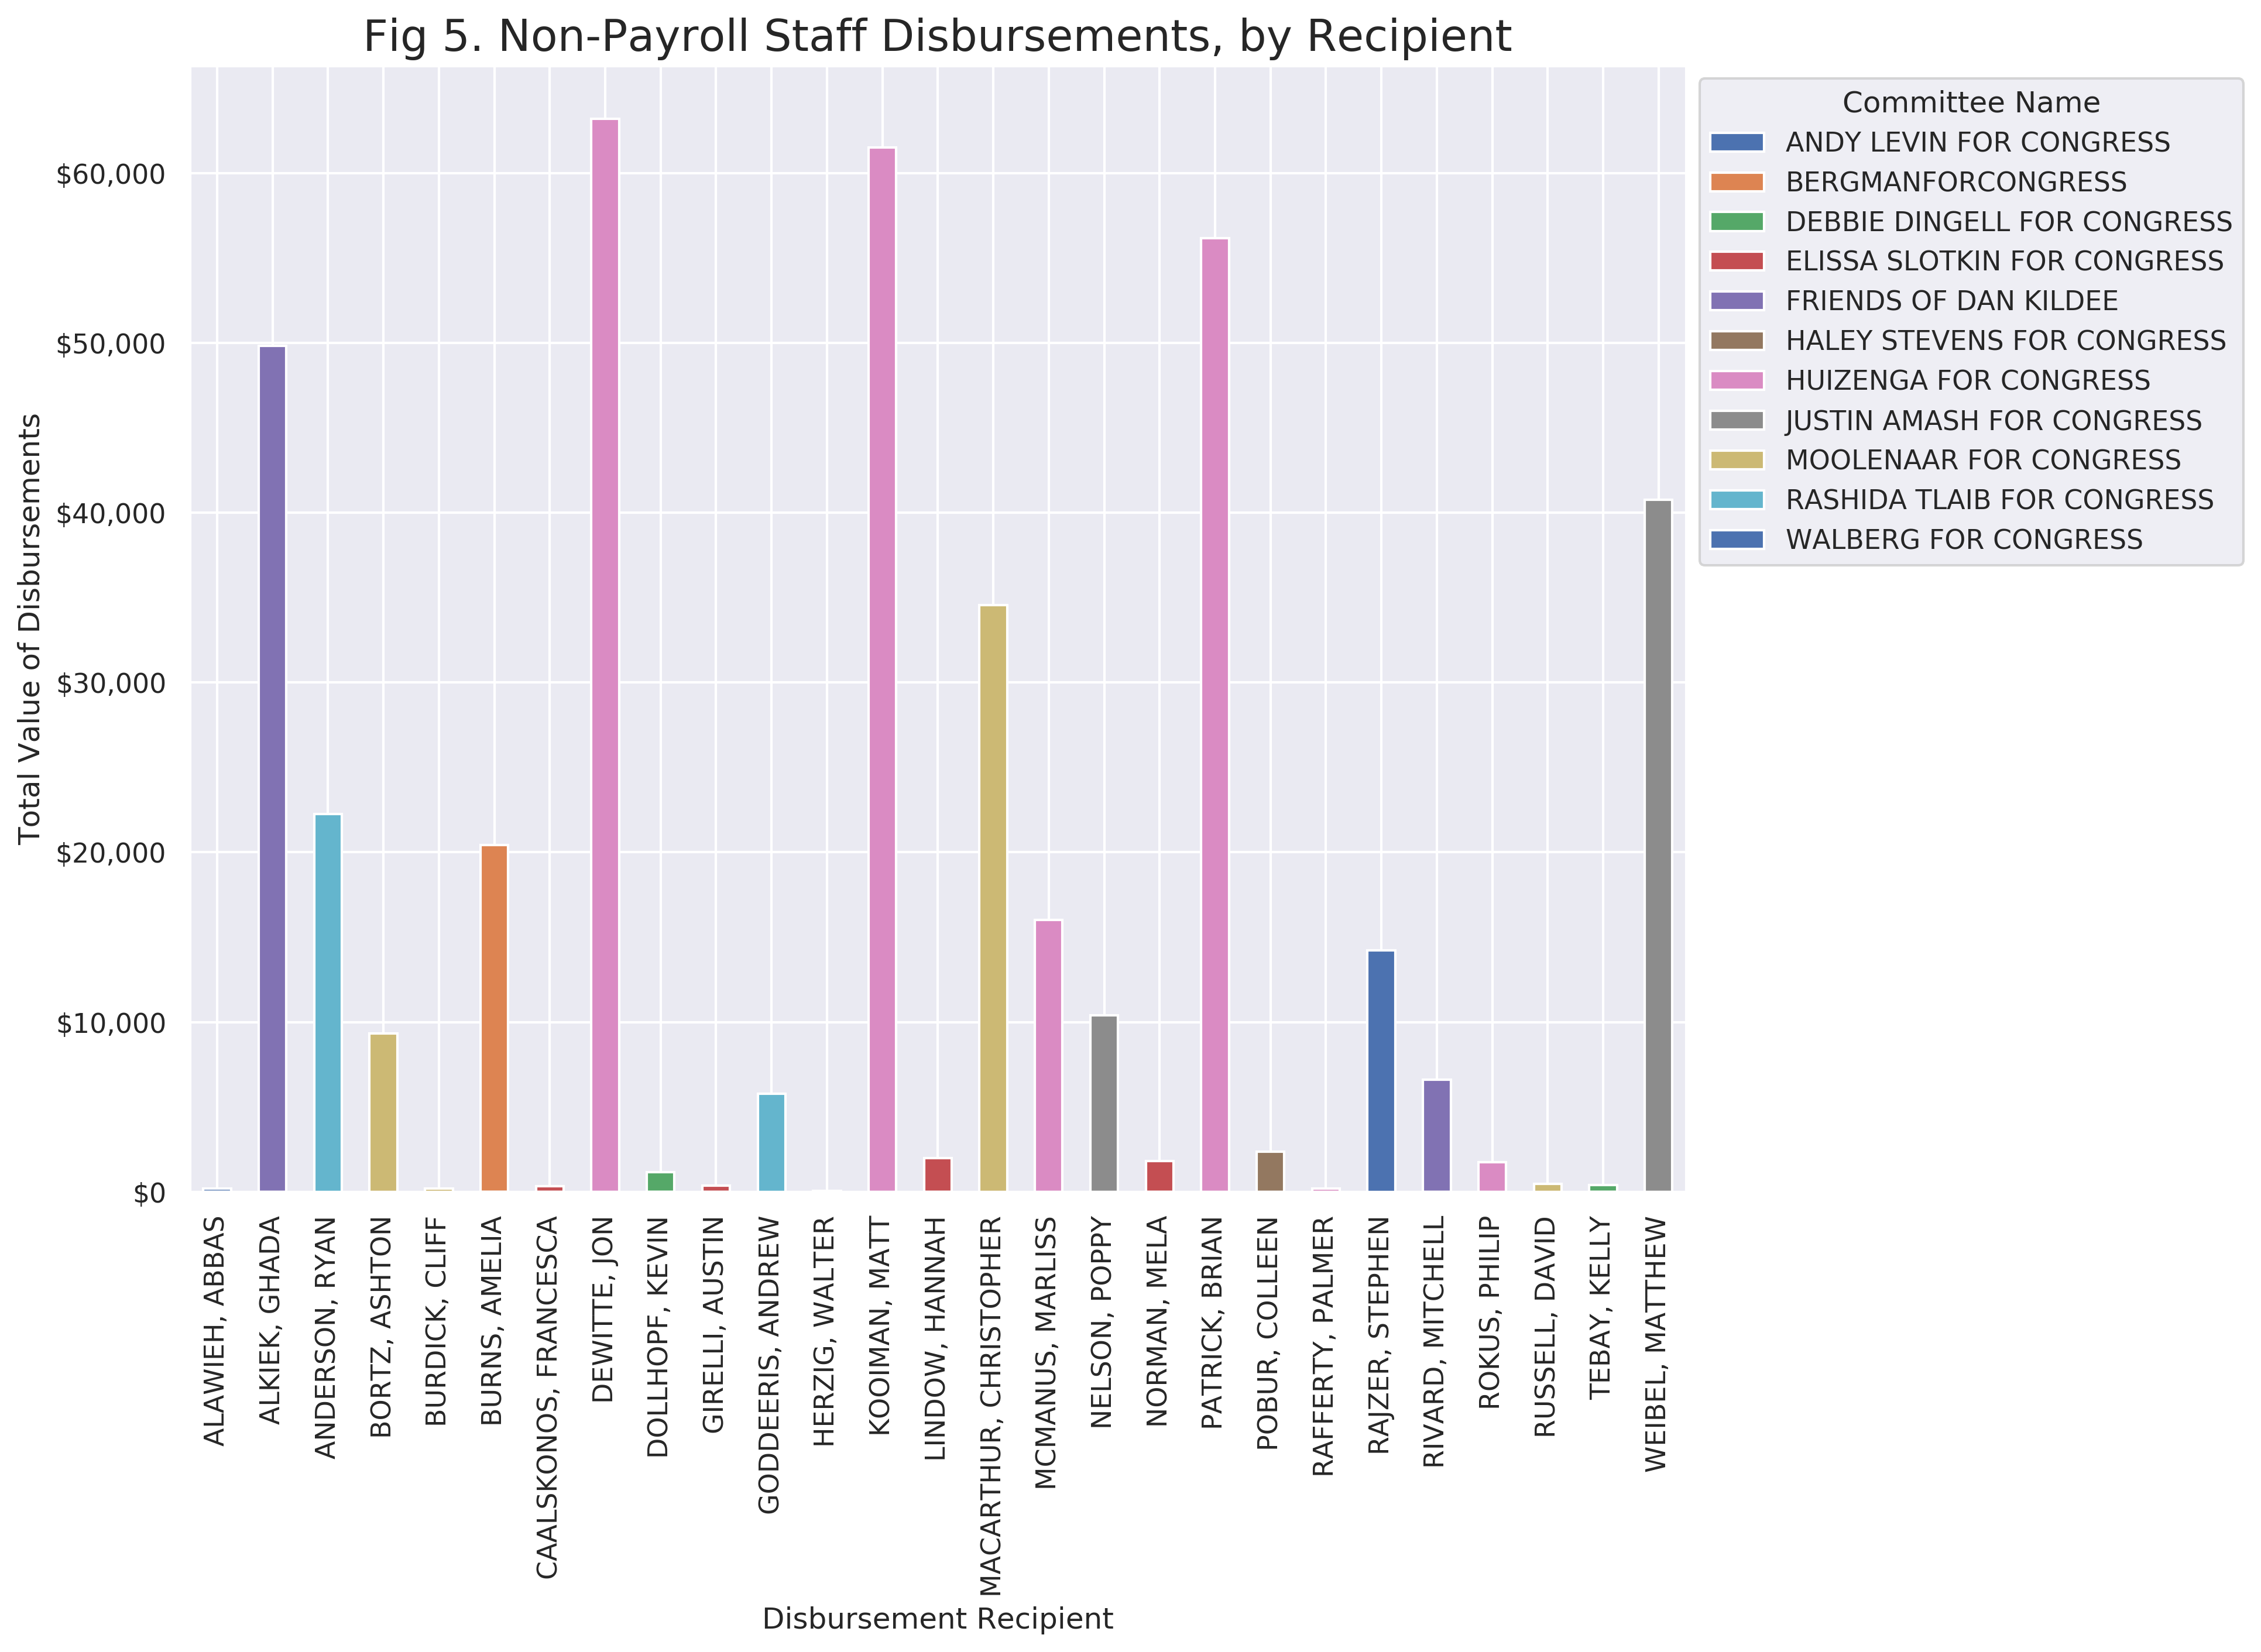

In [129]:
ax = _["disbursement_sum"].unstack().plot(kind="bar", stacked=True)
# Labels
plt.xlabel("Disbursement Recipient")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
plt.legend(title="Committee Name", bbox_to_anchor=(1.0, 1))
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Non-Payroll Staff Disbursements, by Recipient"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Non-Payroll Staff Disbursement, Grouped By Committee Name & Disbursement Purpose Category

In [130]:
_ = non_payroll_df.groupby(['committee_name', 'disbursement_purpose_category']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              disbursement_purpose_category                       
ANDY LEVIN FOR CONGRESS     OTHER                                           2   
BERGMANFORCONGRESS          ADMINISTRATIVE                                  3   
                            OTHER                                          21   
DEBBIE DINGELL FOR CONGRESS OTHER                                           1   
                            TRAVEL                                          7   
ELISSA SLOTKIN FOR CONGRESS OTHER                                          14   
FRIENDS OF DAN KILDEE       ADMINISTRATIVE                                  1   
                            ADVERTISING                                     2   
                            MATERIALS                                       5   
                            OTHER                                          23   
                            REFUNDS                                         1   
HALEY STEVENS FOR CONGRESS  OTHER                                           2   
                            TRAVEL                                          1   
HUIZENGA FOR CONGRESS       FUNDRAISING                                     4   
                            MATERIALS                                      14   
                            OTHER                                         207   
JUSTIN AMASH FOR CONGRESS   MATERIALS                                       2   
                            OTHER                                          20   
MOOLENAAR FOR CONGRESS      MATERIALS                                       8   
                            OTHER                                          79   
RASHIDA TLAIB FOR CONGRESS  ADMINISTRATIVE                                  2   
                            FUNDRAISING                                     1   
                            MATERIALS                                       1   
                            OTHER                                           8   
WALBERG FOR CONGRESS        ADMINISTRATIVE                                  2   
                            OTHER                                          35   

                                                           disbursement_sum  
committee_name              disbursement_purpose_category                    
ANDY LEVIN FOR CONGRESS     OTHER                                    279.96  
BERGMANFORCONGRESS          ADMINISTRATIVE                           179.49  
                            OTHER                                  20258.36  
DEBBIE DINGELL FOR CONGRESS OTHER                                    407.62  
                            TRAVEL                                  1150.10  
ELISSA SLOTKIN FOR CONGRESS OTHER                                   4513.47  
FRIENDS OF DAN KILDEE       ADMINISTRATIVE                           182.38  
                            ADVERTISING                              868.04  
                            MATERIALS                               1047.03  
                            OTHER                                  54338.67  
                            REFUNDS                                    5.00  
HALEY STEVENS FOR CONGRESS  OTHER                                   2103.26  
                            TRAVEL                                   255.85  
HUIZENGA FOR CONGRESS       FUNDRAISING                             4195.00  
                            MATERIALS                              36221.18  
                            OTHER                                 158406.78  
JUSTIN AMASH FOR CONGRESS   MATERIALS                                959.09  
                            OTHER                                  50186.83  
MOOLENAAR FOR CONGRESS      MATERIALS                               1799.19  
                            OTHER                                  42751.85  
RASHIDA TLAIB FOR CONGRESS  ADMINISTRATIVE                           164.4

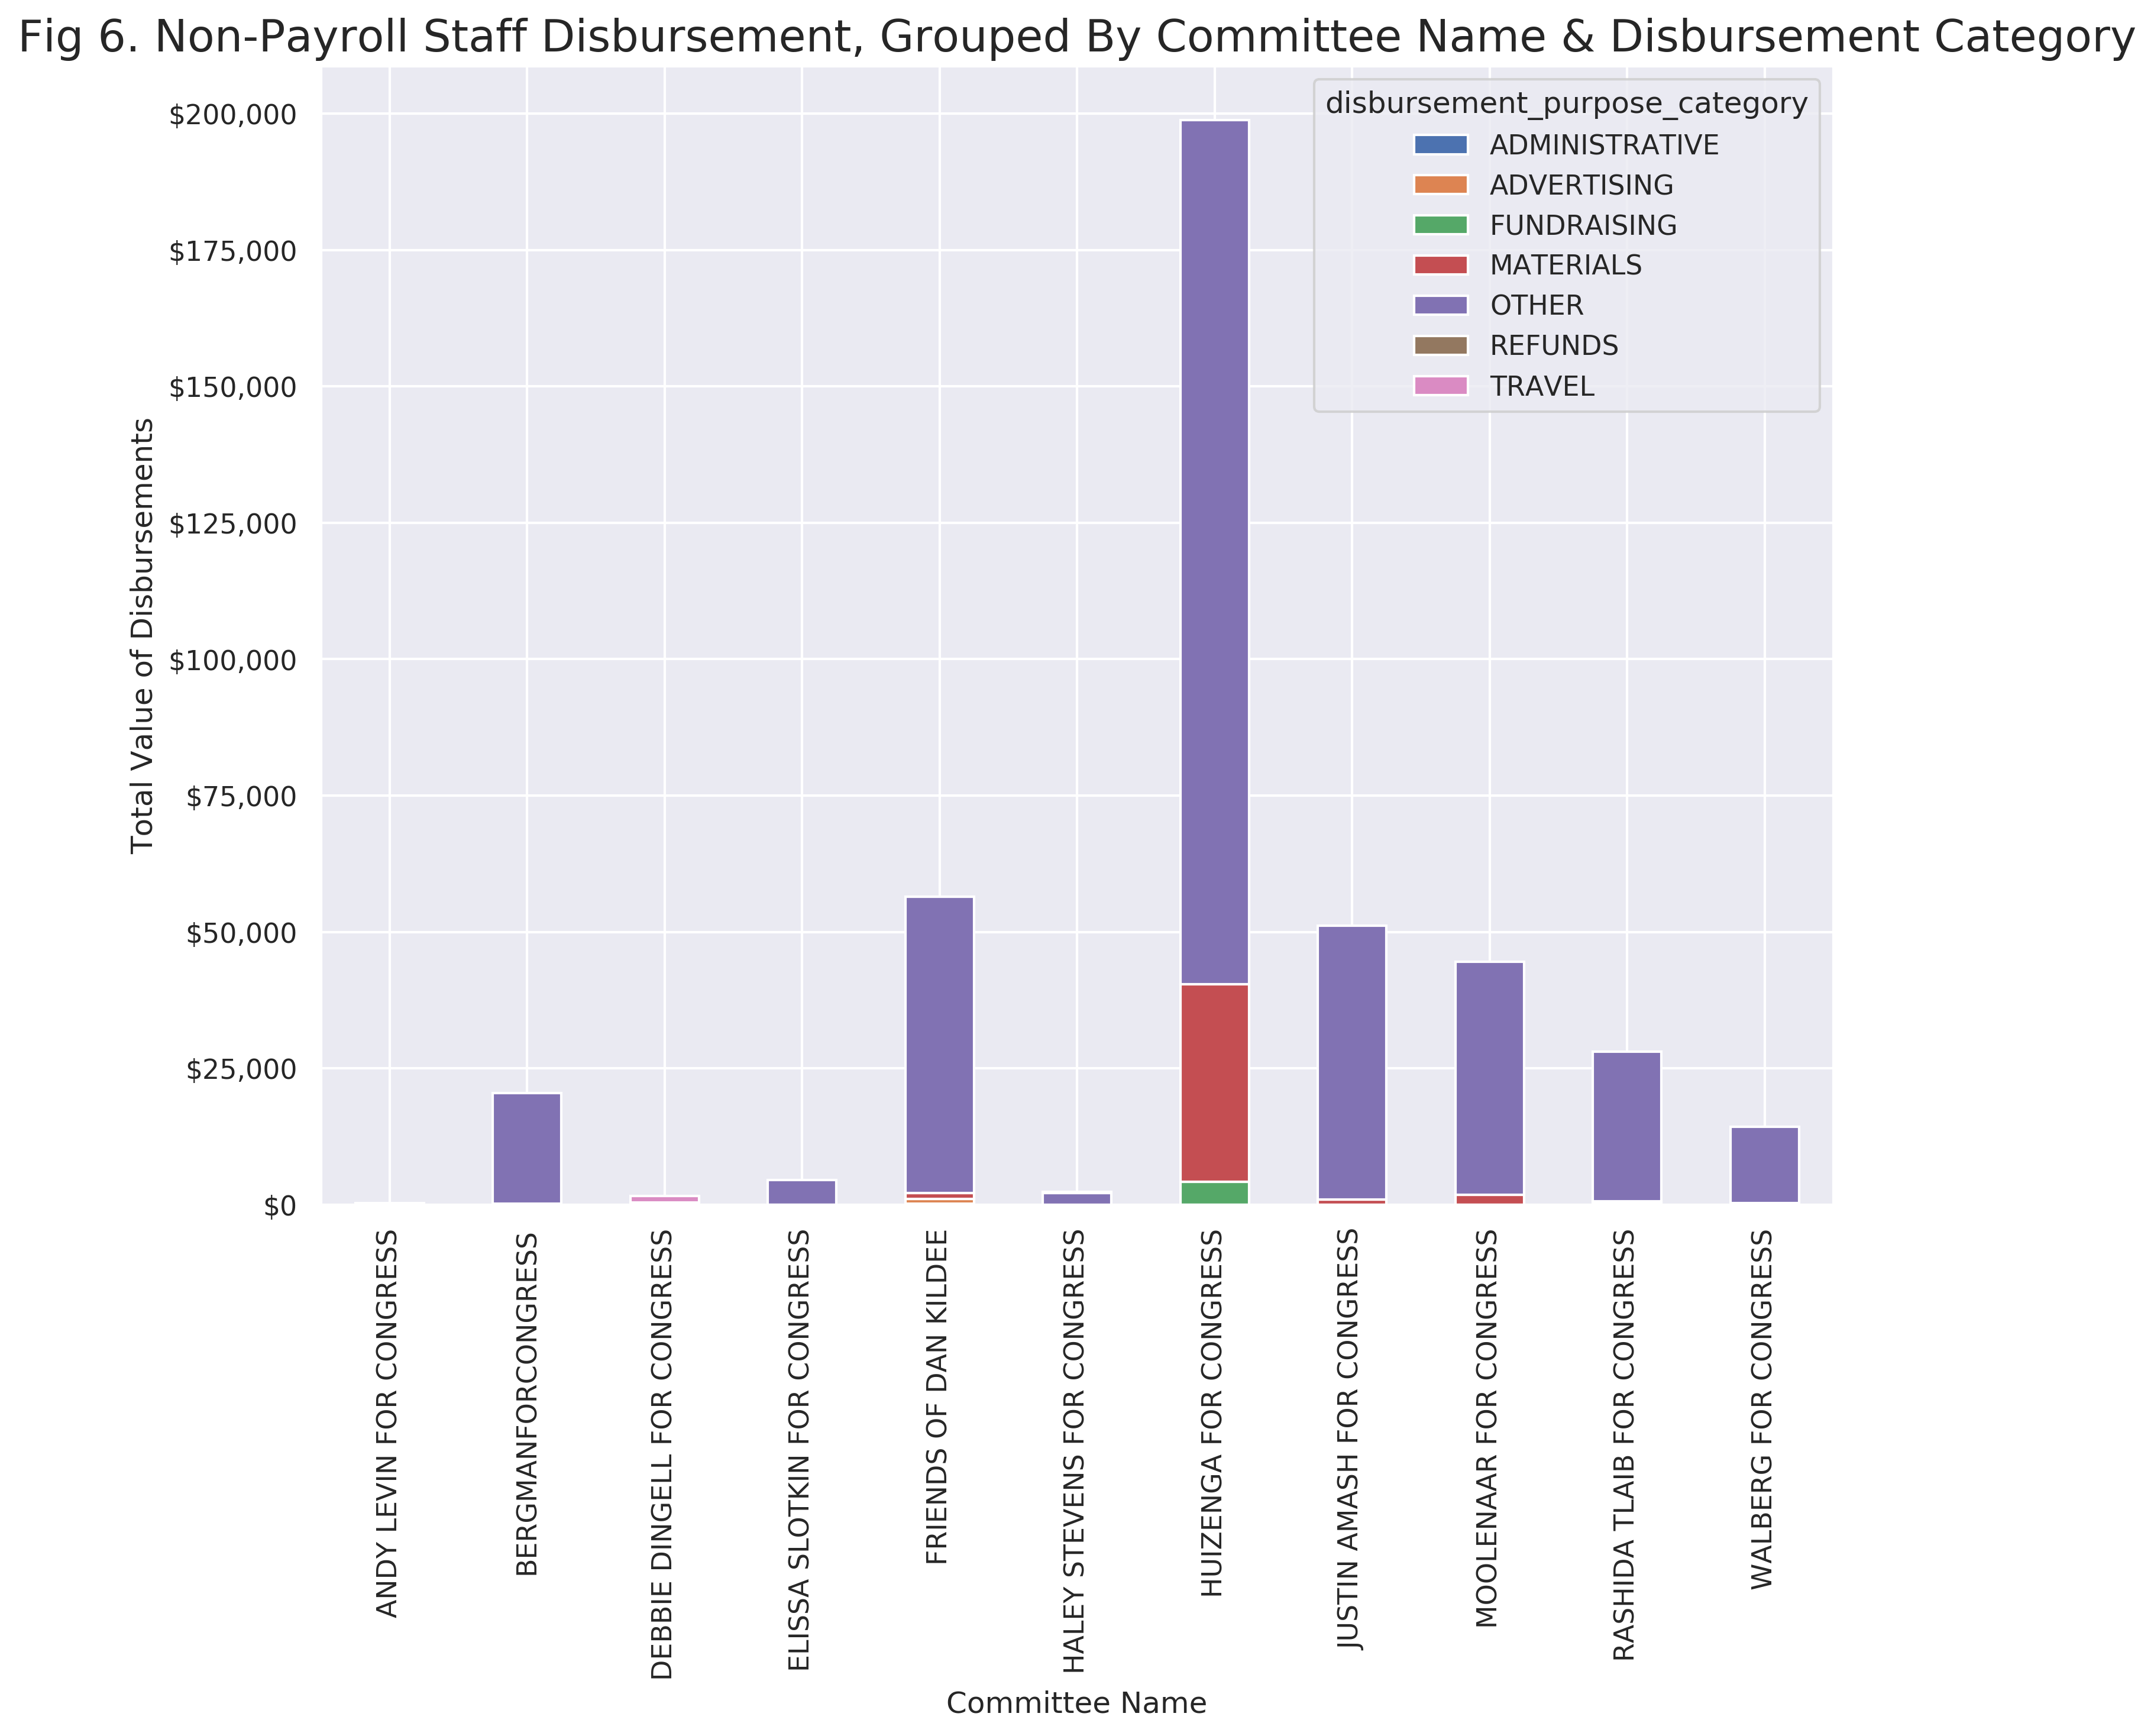

In [131]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Non-Payroll Staff Disbursement, Grouped By Committee Name & Disbursement Category"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Non-Payroll Material Staff Disbursement, Grouped By Committee Name & Disbursement Description

>> “The definition of the term contribution in the FECA is quite detailed . . . **[U]nder FEC regulations, most outlays that an individual makes on behalf of a campaign are deemed to be a contribution to that campaign from that individual.** This is so even if it is intended that the campaign will reimburse the individual promptly. The major exception to this rule is for outlays that an individual makes to cover expenses that he or she incurs in traveling on behalf of a campaign.” Assuming certain travel outlays are reimbursed within specified time periods, they will not be considered “contributions.”

In [132]:
material_df = non_payroll_df[non_payroll_df.disbursement_purpose_category=="MATERIALS"]
_ = material_df.groupby(['committee_name','disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name             disbursement_description                               
FRIENDS OF DAN KILDEE      EXPENSE REIMBURSEMENT                              2   
                           FOOD FOR OFFICE OPEN HOUSE                         1   
                           TRAVEL EXPENSE REIMBURSEMENT                       2   
HUIZENGA FOR CONGRESS      ADMINISTRATIVE EXPENSE                             2   
                           CAMPAIGN EXPENSES                                  5   
                           EXPENSE REIMBURSEMENT                              2   
                           EXPENSES                                           3   
                           MILEAGE EXPENSE                                    1   
                           PHONE EXPENSE                                      1   
JUSTIN AMASH FOR CONGRESS  TRAVEL EXPENSE--SEE MEMO                           1   
                           TRAVEL EXPENSE-SEE MEMOS                           1   
MOOLENAAR FOR CONGRESS     EXPENSE REIMBURSEMENT - ITEMIZED                   1   
                           MILEAGE - EXPENSES ITEMIZED                        2   
                           MILEAGE, EXPENSES - ITEMIZED                       5   
RASHIDA TLAIB FOR CONGRESS REIMBURSEMENT OF TRAVEL EXPENSES                   1   

                                                             disbursement_sum  
committee_name             disbursement_description                            
FRIENDS OF DAN KILDEE      EXPENSE REIMBURSEMENT                       642.66  
                           FOOD FOR OFFICE OPEN HOUSE                   42.47  
                           TRAVEL EXPENSE REIMBURSEMENT                361.90  
HUIZENGA FOR CONGRESS      ADMINISTRATIVE EXPENSE                     1000.00  
                           CAMPAIGN EXPENSES                         20675.85  
                           EXPENSE REIMBURSEMENT                      3114.20  
                           EXPENSES                                  11132.20  
                           MILEAGE EXPENSE                             213.27  
                           PHONE EXPENSE                                85.66  
JUSTIN AMASH FOR CONGRESS  TRAVEL EXPENSE--SEE MEMO                    155.09  
                           TRAVEL EXPENSE-SEE MEMOS                    804.00  
MOOLENAAR FOR CONGRESS     EXPENSE REIMBURSEMENT - ITEMIZED            731.62  
                           MILEAGE - EXPENSES ITEMIZED                 712.75  
                           MILEAGE, EXPENSES - ITEMIZED                354.82  
RASHIDA TLAIB FOR CONGRESS REIMBURSEMENT OF TRAVEL EXPENSES            264.11

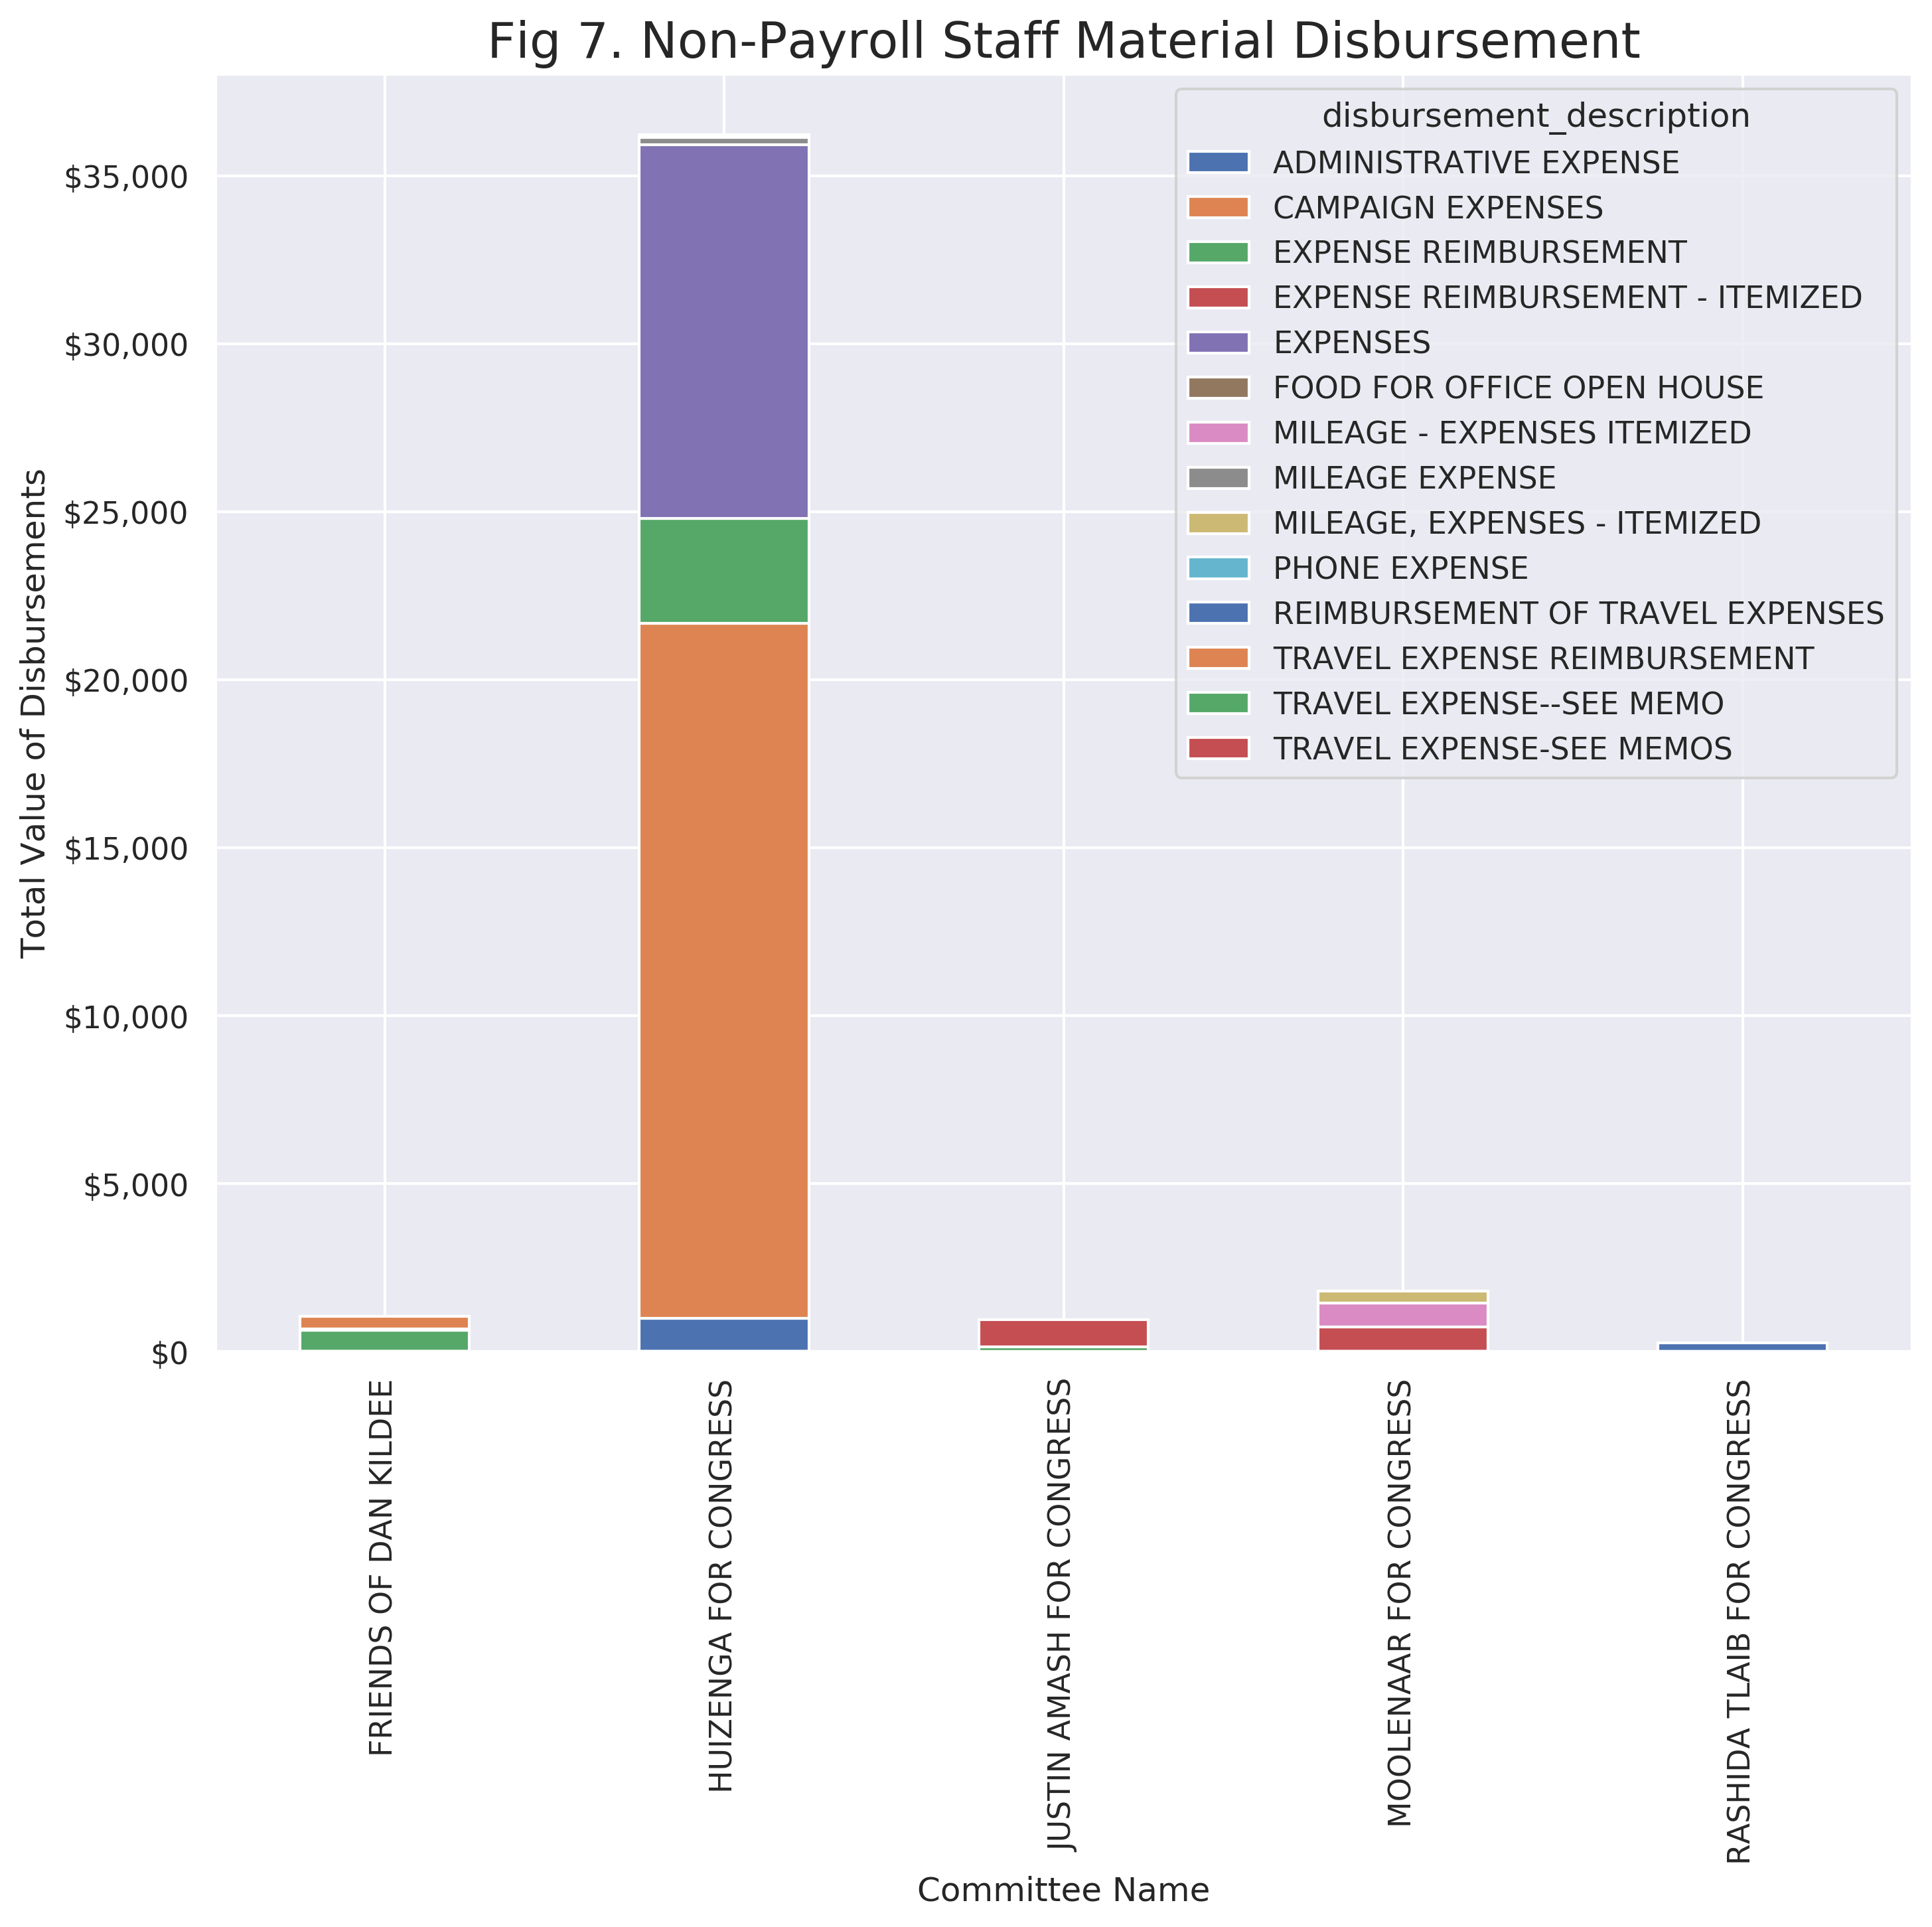

In [133]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Non-Payroll Staff Material Disbursement"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Non-Payroll Material Staff Disbursement, Grouped By Committee Name, Recipient, & Disbursement Description

In [135]:
_ = material_df.groupby(['committee_name','recipient', 'disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name             recipient              disbursement_description                               
FRIENDS OF DAN KILDEE      ALKIEK, GHADA          FOOD FOR OFFICE OPEN HOUSE                         1   
                           RIVARD, MITCHELL       EXPENSE REIMBURSEMENT                              2   
                                                  TRAVEL EXPENSE REIMBURSEMENT                       2   
HUIZENGA FOR CONGRESS      DEWITTE, JON           CAMPAIGN EXPENSES                                  5   
                                                  EXPENSES                                           3   
                           KOOIMAN, MATT          ADMINISTRATIVE EXPENSE                             2   
                                                  MILEAGE EXPENSE                                    1   
                                                  PHONE EXPENSE                                      1   
                           MCMANUS, MARLISS       EXPENSE REIMBURSEMENT                              2   
JUSTIN AMASH FOR CONGRESS  NELSON, POPPY          TRAVEL EXPENSE--SEE MEMO                           1   
                           WEIBEL, MATTHEW        TRAVEL EXPENSE-SEE MEMOS                           1   
MOOLENAAR FOR CONGRESS     BORTZ, ASHTON          MILEAGE - EXPENSES ITEMIZED                        2   
                           BURDICK, CLIFF         MILEAGE, EXPENSES - ITEMIZED                       4   
                           MACARTHUR, CHRISTOPHER EXPENSE REIMBURSEMENT - ITEMIZED                   1   
                                                  MILEAGE, EXPENSES - ITEMIZED                       1   
RASHIDA TLAIB FOR CONGRESS ANDERSON, RYAN         REIMBURSEMENT OF TRAVEL EXPENSES                   1   

                                                                                    disbursement_sum  
committee_name             recipient              disbursement_description                            
FRIENDS OF DAN KILDEE      ALKIEK, GHADA          FOOD FOR OFFICE OPEN HOUSE                   42.47  
                           RIVARD, MITCHELL       EXPENSE REIMBURSEMENT                       642.66  
                                                  TRAVEL EXPENSE REIMBURSEMENT                361.90  
HUIZENGA FOR CONGRESS      DEWITTE, JON           CAMPAIGN EXPENSES                         20675.85  
                                                  EXPENSES                                  11132.20  
                           KOOIMAN, MATT          ADMINISTRATIVE EXPENSE                     1000.00  
                                                  MILEAGE EXPENSE                             213.27  
                                                  PHONE EXPENSE                                85.66  
                           MCMANUS, MARLISS       EXPENSE REIMBURSEMENT                      3114.20  
JUSTIN AMASH FOR CONGRESS  NELSON, POPPY          TRAVEL EXPENSE--SEE MEMO                    155.09  
                           WEIBEL, MATTHEW        TRAVEL EXPENSE-SEE MEMOS                    804.00  
MOOLENAAR FOR CONGRESS     BORTZ, ASHTON          MILEAGE - EXPENSES ITEMIZED                 712.75  
                           BURDICK, CLIFF         MILEAGE, EXPENSES - ITEMIZED                178.71  
                           MACARTHUR, CHRISTOPHER EXPENSE REIMBURSEMENT - ITEMIZED            731.62  
                                                  MILEAGE, EXPENSES - ITEMIZED                176.11  
RASHIDA TLAIB FOR CONGRESS ANDERSON, RYAN         REIMBURSEMENT OF TRAVEL EXPENSES            264.11

# Misc. Disbursement Analysis

## Mileage

What campaign staff gets reimbursed most for driving.

In [136]:
df.disbursement_description = df.disbursement_description.apply(str)
mileage_df = df2[
    df2.disbursement_description.str.contains("MILE")
]

### Staff mileage disbursement, Grouped by Committee Name

In [137]:
_ = mileage_df.groupby(['committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  disbursement_sum
committee_name                                                   
HALEY STEVENS FOR CONGRESS                    1            327.70
ELISSA SLOTKIN FOR CONGRESS                   6           1086.90
WALBERG FOR CONGRESS                         22          10410.20
MOOLENAAR FOR CONGRESS                       69          22114.57
HUIZENGA FOR CONGRESS                        97          46052.65

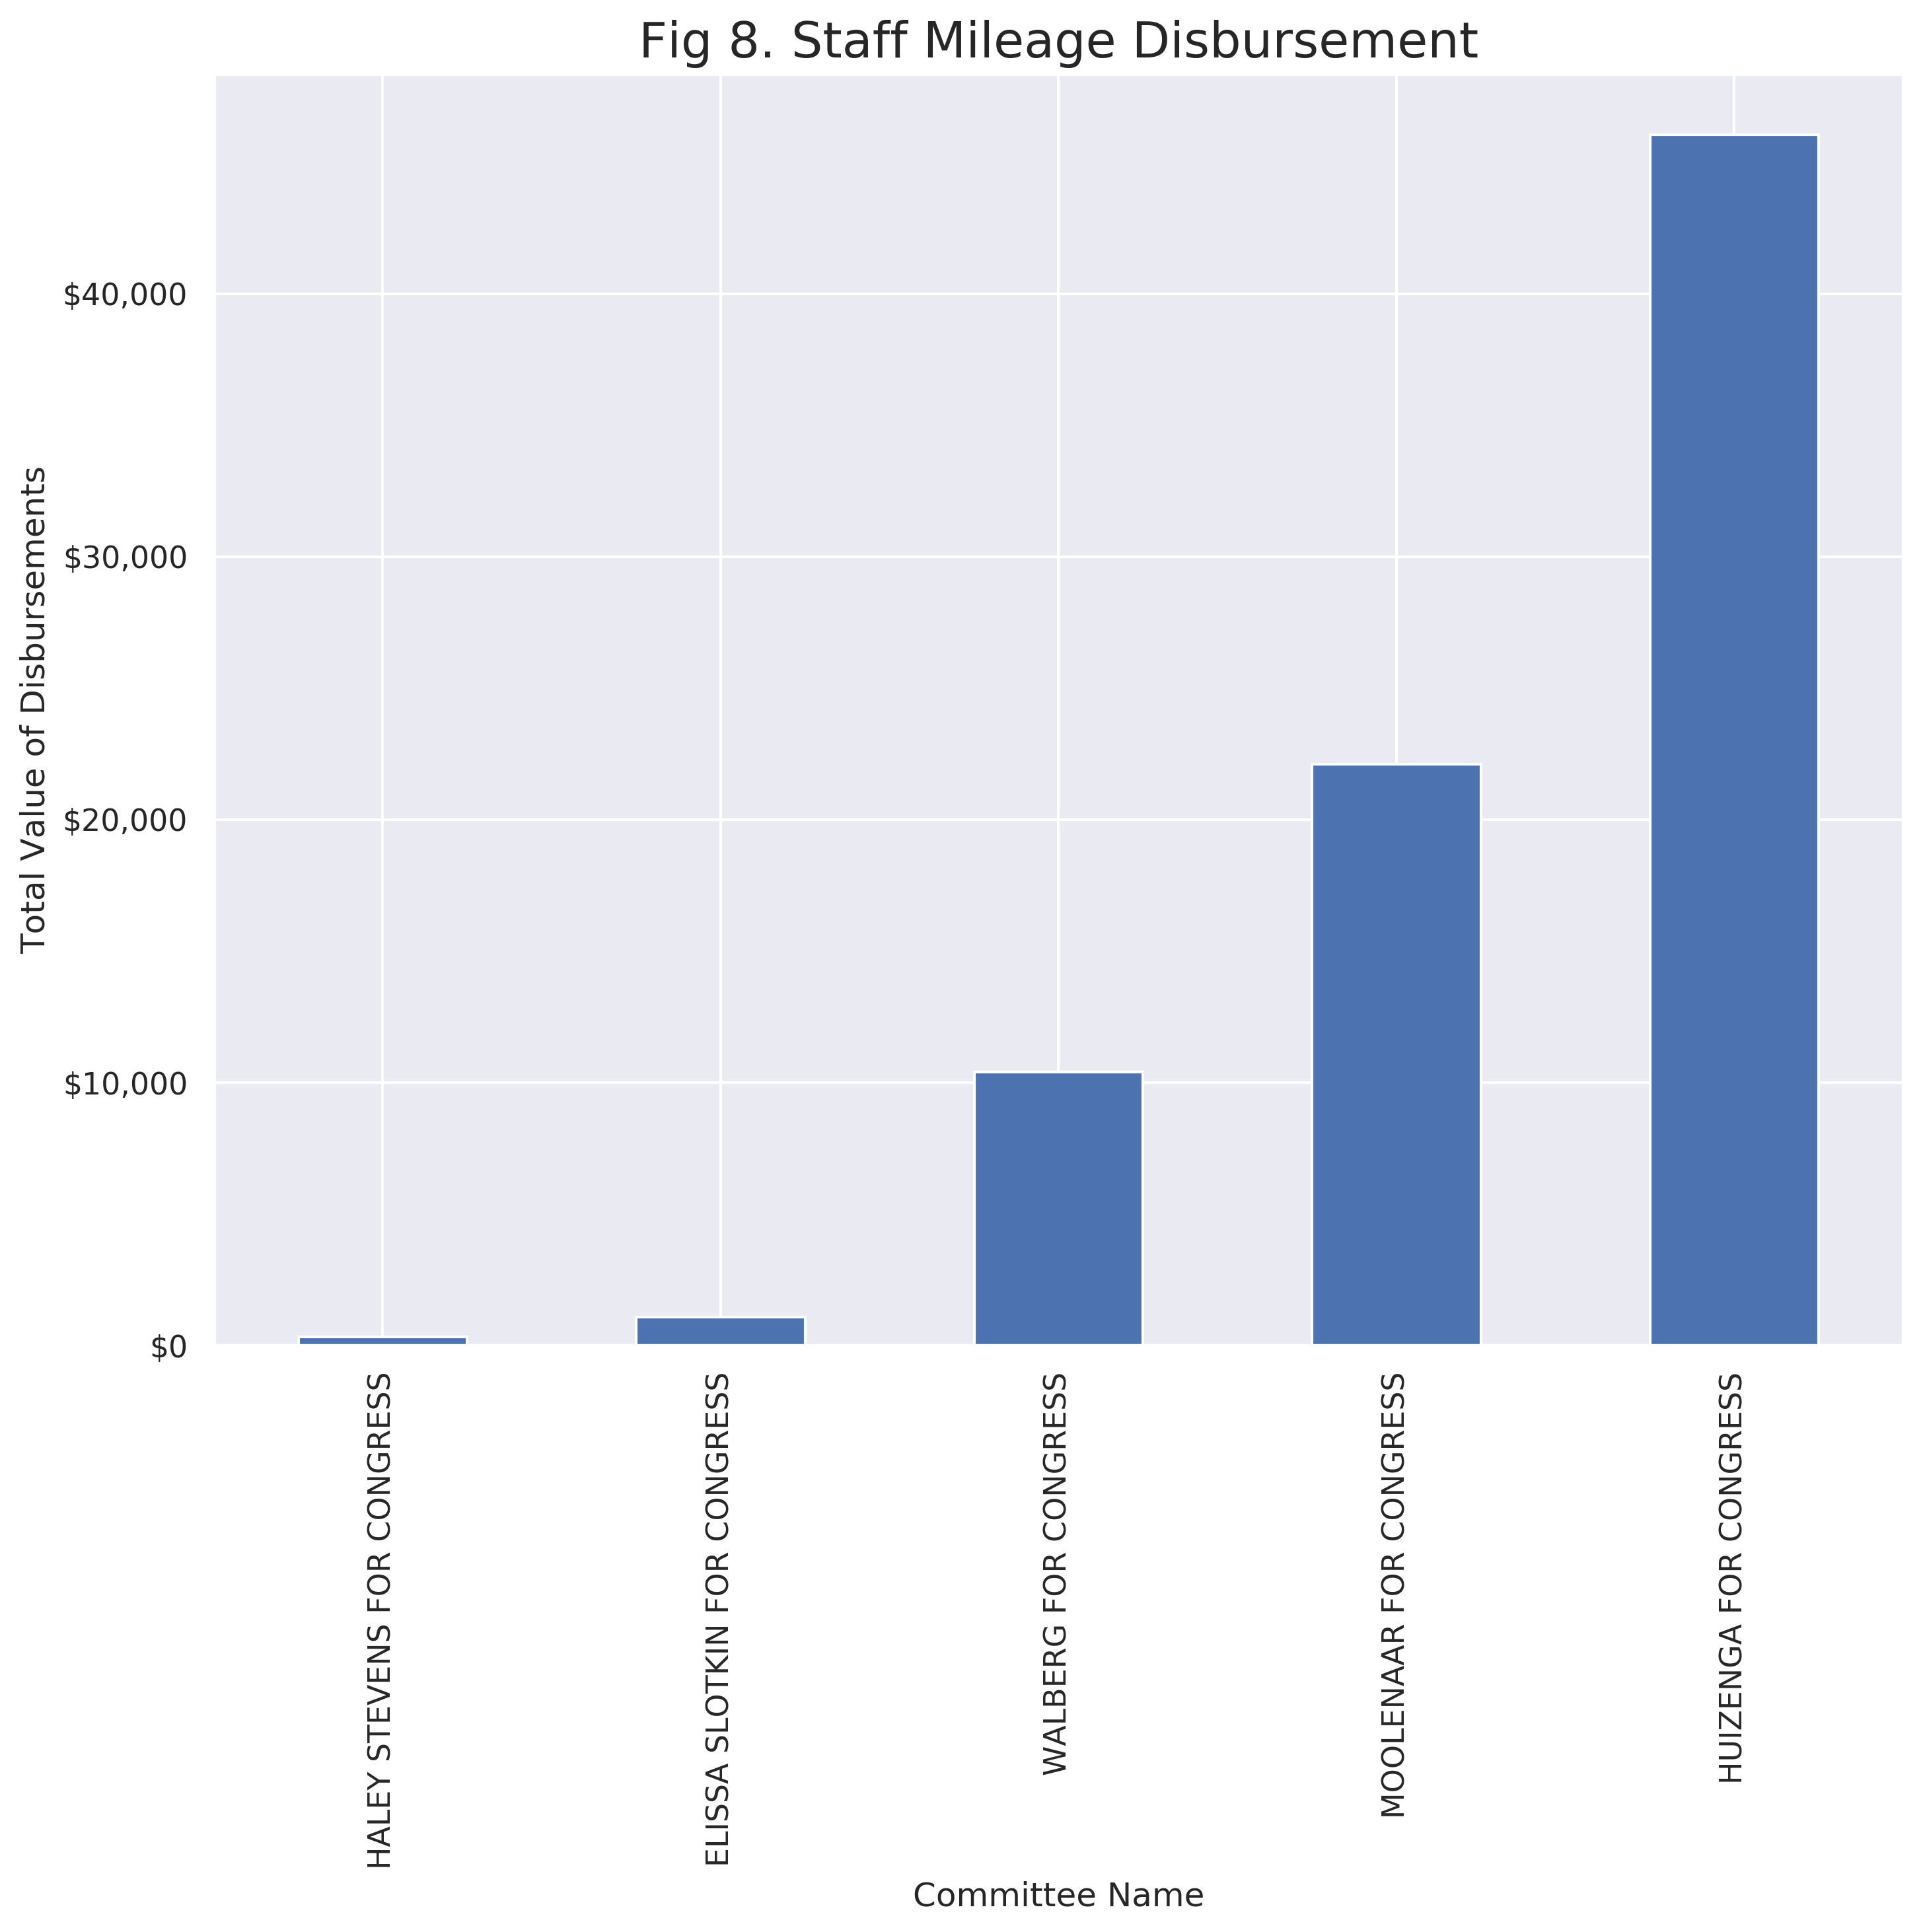

In [138]:
ax = _["disbursement_sum"].plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Staff Mileage Disbursement"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

### Staff mileage disbursement, Grouped by Committee Name with Full Disbursement Description

In [139]:
_ = mileage_df.groupby(['committee_name','disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              disbursement_description                                     
ELISSA SLOTKIN FOR CONGRESS MILEAGE REIMBURSEMENT                                    6   
HALEY STEVENS FOR CONGRESS  MILEAGE                                                  1   
HUIZENGA FOR CONGRESS       CAMPAIGN EVENT: MILEAGE REIMBURSEMENT                    1   
                            MILEAGE EXPENSE                                          1   
                            MILEAGE REIMBURSEMENT                                   66   
                            REIMBURSEMENT FOR MILEAGE                                2   
                            TRAVEL: MILEAGE REIMBURSEMENT                           27   
MOOLENAAR FOR CONGRESS      MILEAGE                                                 39   
                            MILEAGE - EXPENSES ITEMIZED                              2   
                            MILEAGE REIMBURSEMENT                                   19   
                            MILEAGE, EQUIPMENT - ITEMIZED                            1   
                            MILEAGE, EXP. REIMBURSEMENT - ITEMIZED                   3   
                            MILEAGE, EXPENSES - ITEMIZED                             5   
WALBERG FOR CONGRESS        MILEAGE                                                 13   
                            TRAVEL: MILEAGE                                          9   

                                                                    disbursement_sum  
committee_name              disbursement_description                                  
ELISSA SLOTKIN FOR CONGRESS MILEAGE REIMBURSEMENT                            1086.90  
HALEY STEVENS FOR CONGRESS  MILEAGE                                           327.70  
HUIZENGA FOR CONGRESS       CAMPAIGN EVENT: MILEAGE REIMBURSEMENT             229.71  
                            MILEAGE EXPENSE                                   213.27  
                            MILEAGE REIMBURSEMENT                           33288.11  
                            REIMBURSEMENT FOR MILEAGE                         454.09  
                            TRAVEL: MILEAGE REIMBURSEMENT                   11867.47  
MOOLENAAR FOR CONGRESS      MILEAGE                                         14591.30  
                            MILEAGE - EXPENSES ITEMIZED                       712.75  
                            MILEAGE REIMBURSEMENT                            5404.05  
                            MILEAGE, EQUIPMENT - ITEMIZED                     526.40  
                            MILEAGE, EXP. REIMBURSEMENT - ITEMIZED            525.25  
                            MILEAGE, EXPENSES - ITEMIZED                      354.82  
WALBERG FOR CONGRESS        MILEAGE                                          7076.30  
                            TRAVEL: MILEAGE                                  3333.90

### Staff mileage disbursement, Grouped by Recipient
Sorted by total disbursement sum.

In [140]:
_ = mileage_df.groupby(['recipient', 'committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  \
recipient              committee_name                                    
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS                   1   
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS                   1   
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                         1   
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                        5   
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS                    1   
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS                   2   
DEWITTE, JON           HUIZENGA FOR CONGRESS                         1   
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                        2   
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS                   2   
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                         2   
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                        13   
PATRICK, BRIAN         HUIZENGA FOR CONGRESS                        17   
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                       49   
RAJZER, STEPHEN        WALBERG FOR CONGRESS                         22   
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS                       13   
KOOIMAN, MATT          HUIZENGA FOR CONGRESS                        63   

                                                    disbursement_sum  
recipient              committee_name                                 
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS             42.44  
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS             97.60  
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                  201.84  
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                 208.73  
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS             327.70  
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS            370.00  
DEWITTE, JON           HUIZENGA FOR CONGRESS                  374.08  
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                 468.53  
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS            576.86  
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                 1747.13  
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                 8195.85  
PATRICK, BRIAN         HUIZENGA FOR CONGRESS                 8874.61  
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                9334.05  
RAJZER, STEPHEN        WALBERG FOR CONGRESS                 10410.20  
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS               12103.26  
KOOIMAN, MATT          HUIZENGA FOR CONGRESS                26659.14

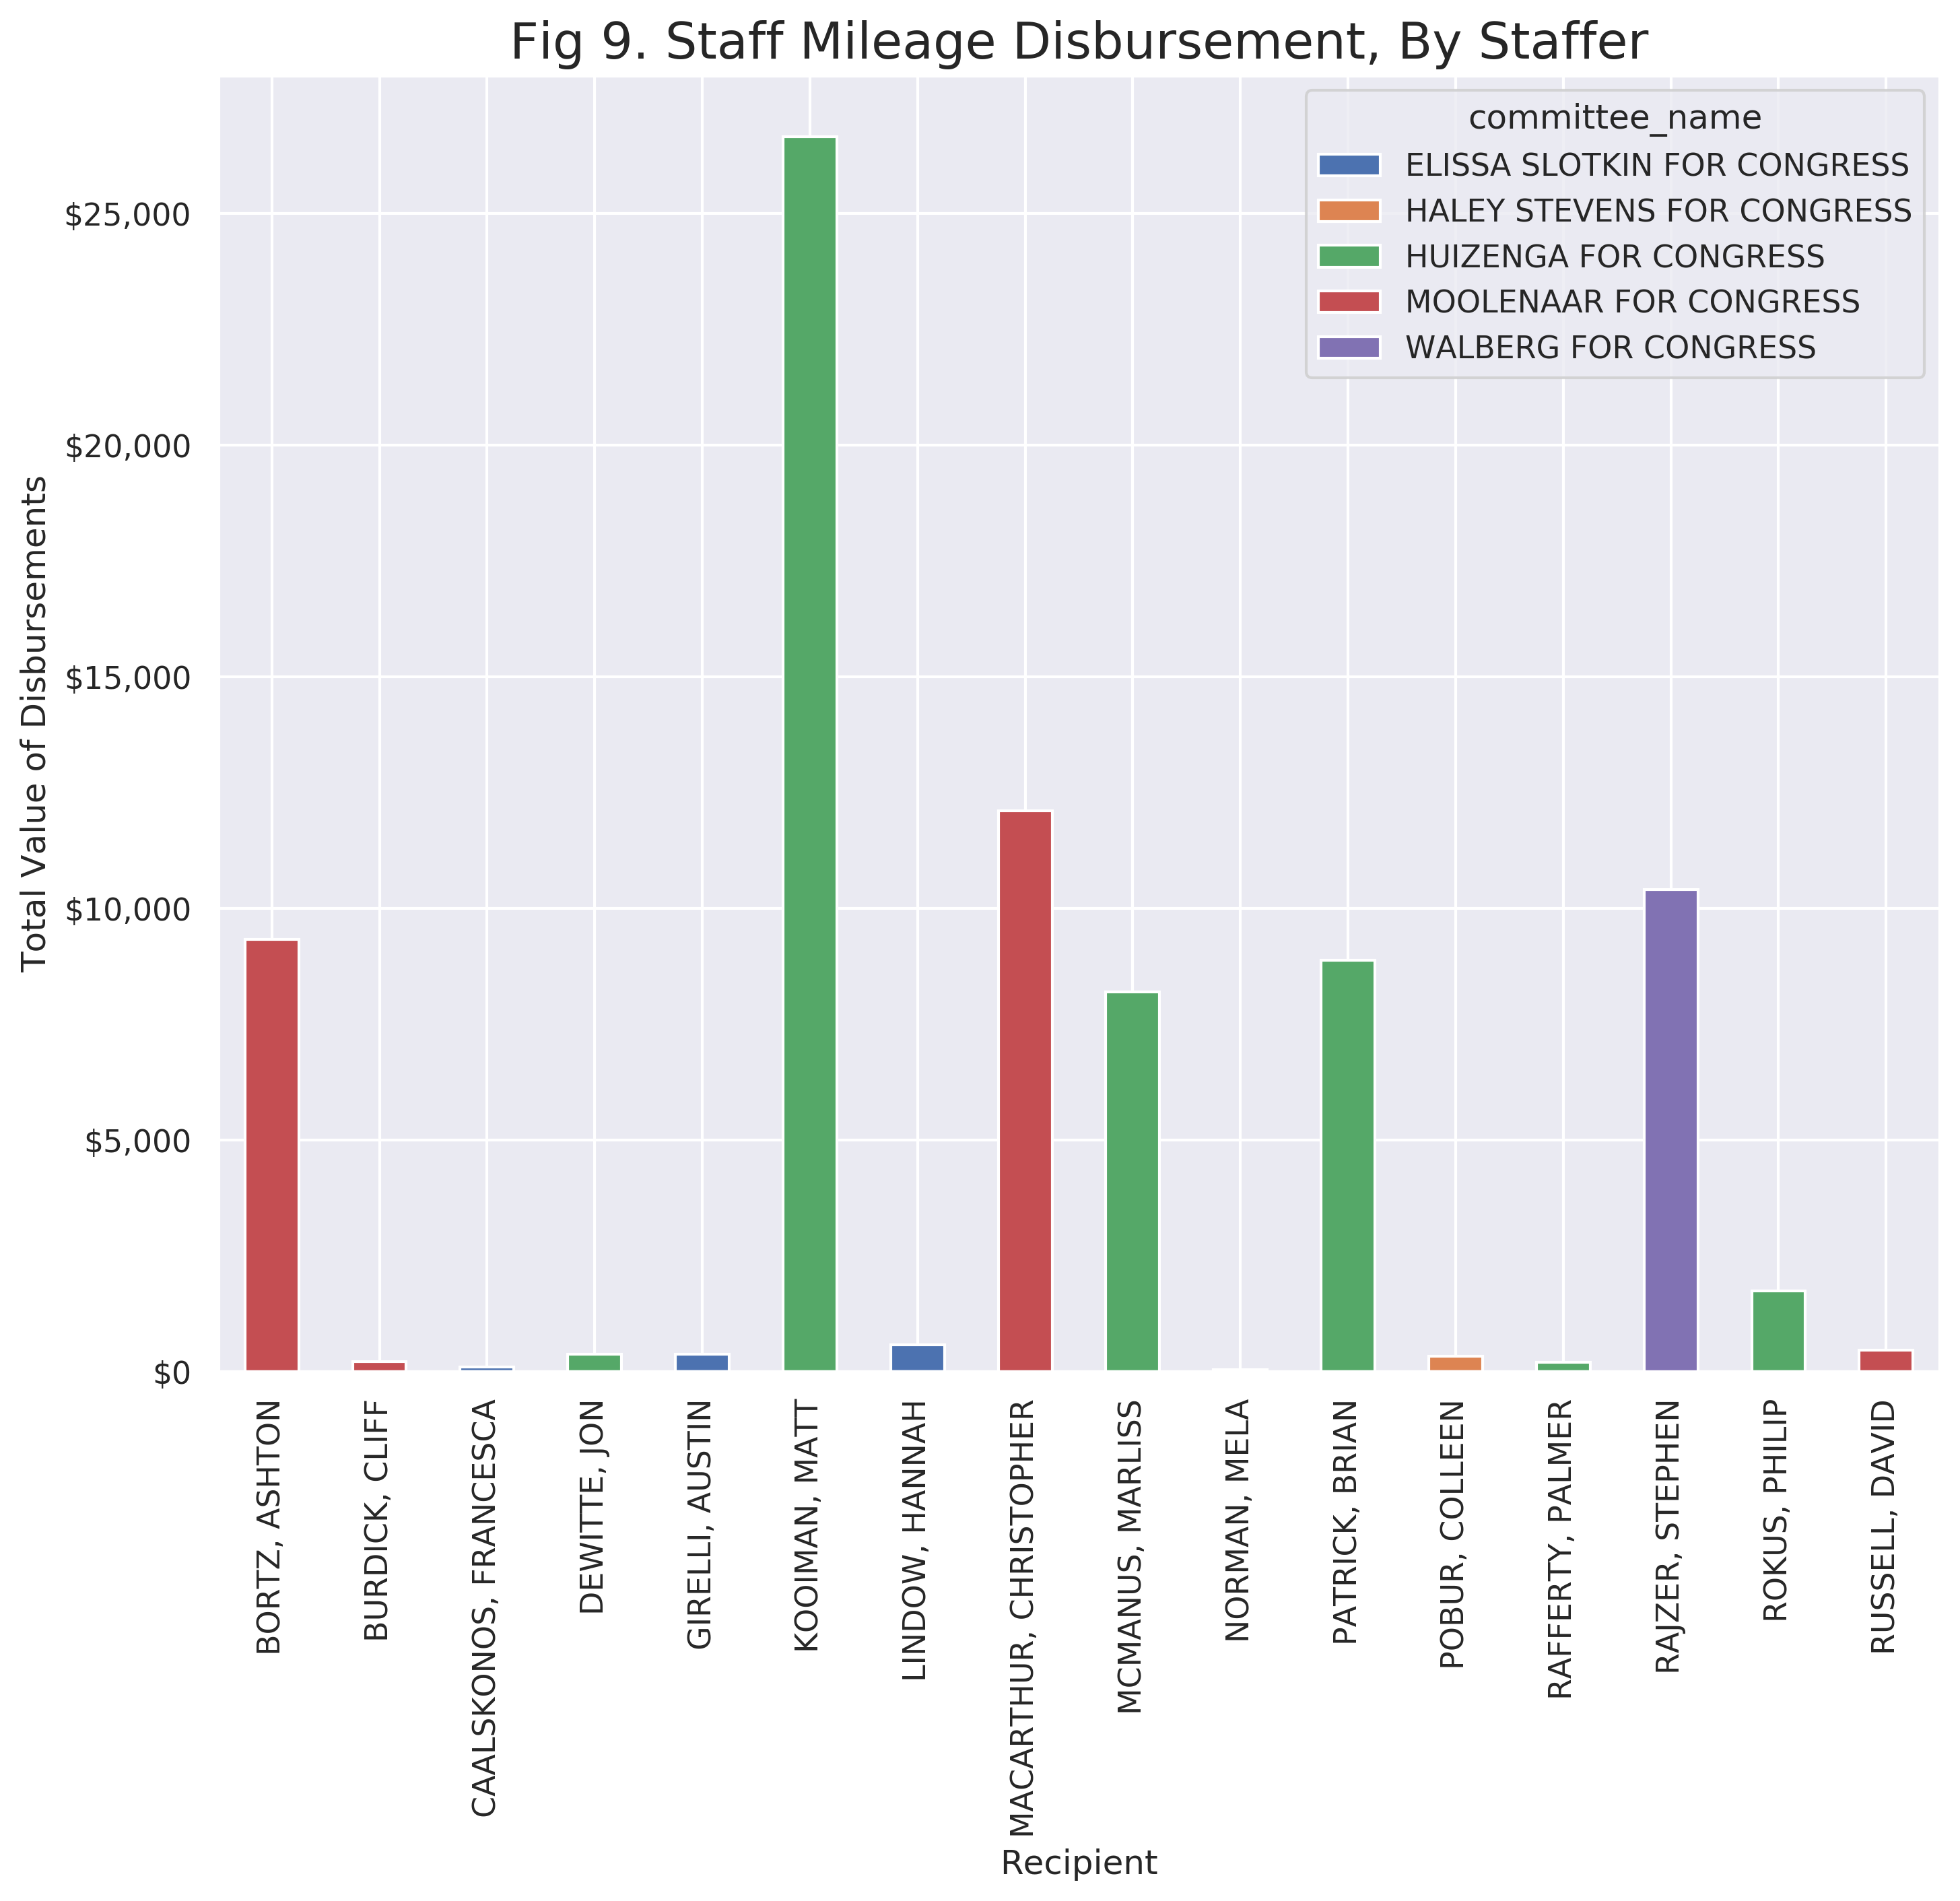

In [141]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Recipient")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Staff Mileage Disbursement, By Staffer"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## Consulting Work

What campaign staff gets reimbursed most for "Consulting" work.

In [98]:
df.disbursement_description = df.disbursement_description.apply(str)
consulting_df = df2[
    df2.disbursement_description.str.contains("CONSULT")
]

### Staff consulting disbursement, Grouped by Committee Name

In [99]:
_ = consulting_df.groupby(['committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  disbursement_sum
committee_name                                                  
RASHIDA TLAIB FOR CONGRESS                   2          16000.00
BERGMANFORCONGRESS                           9          17095.00
FRIENDS OF DAN KILDEE                       17          43672.56
JUSTIN AMASH FOR CONGRESS                   14          43749.66
HUIZENGA FOR CONGRESS                       90          83463.40

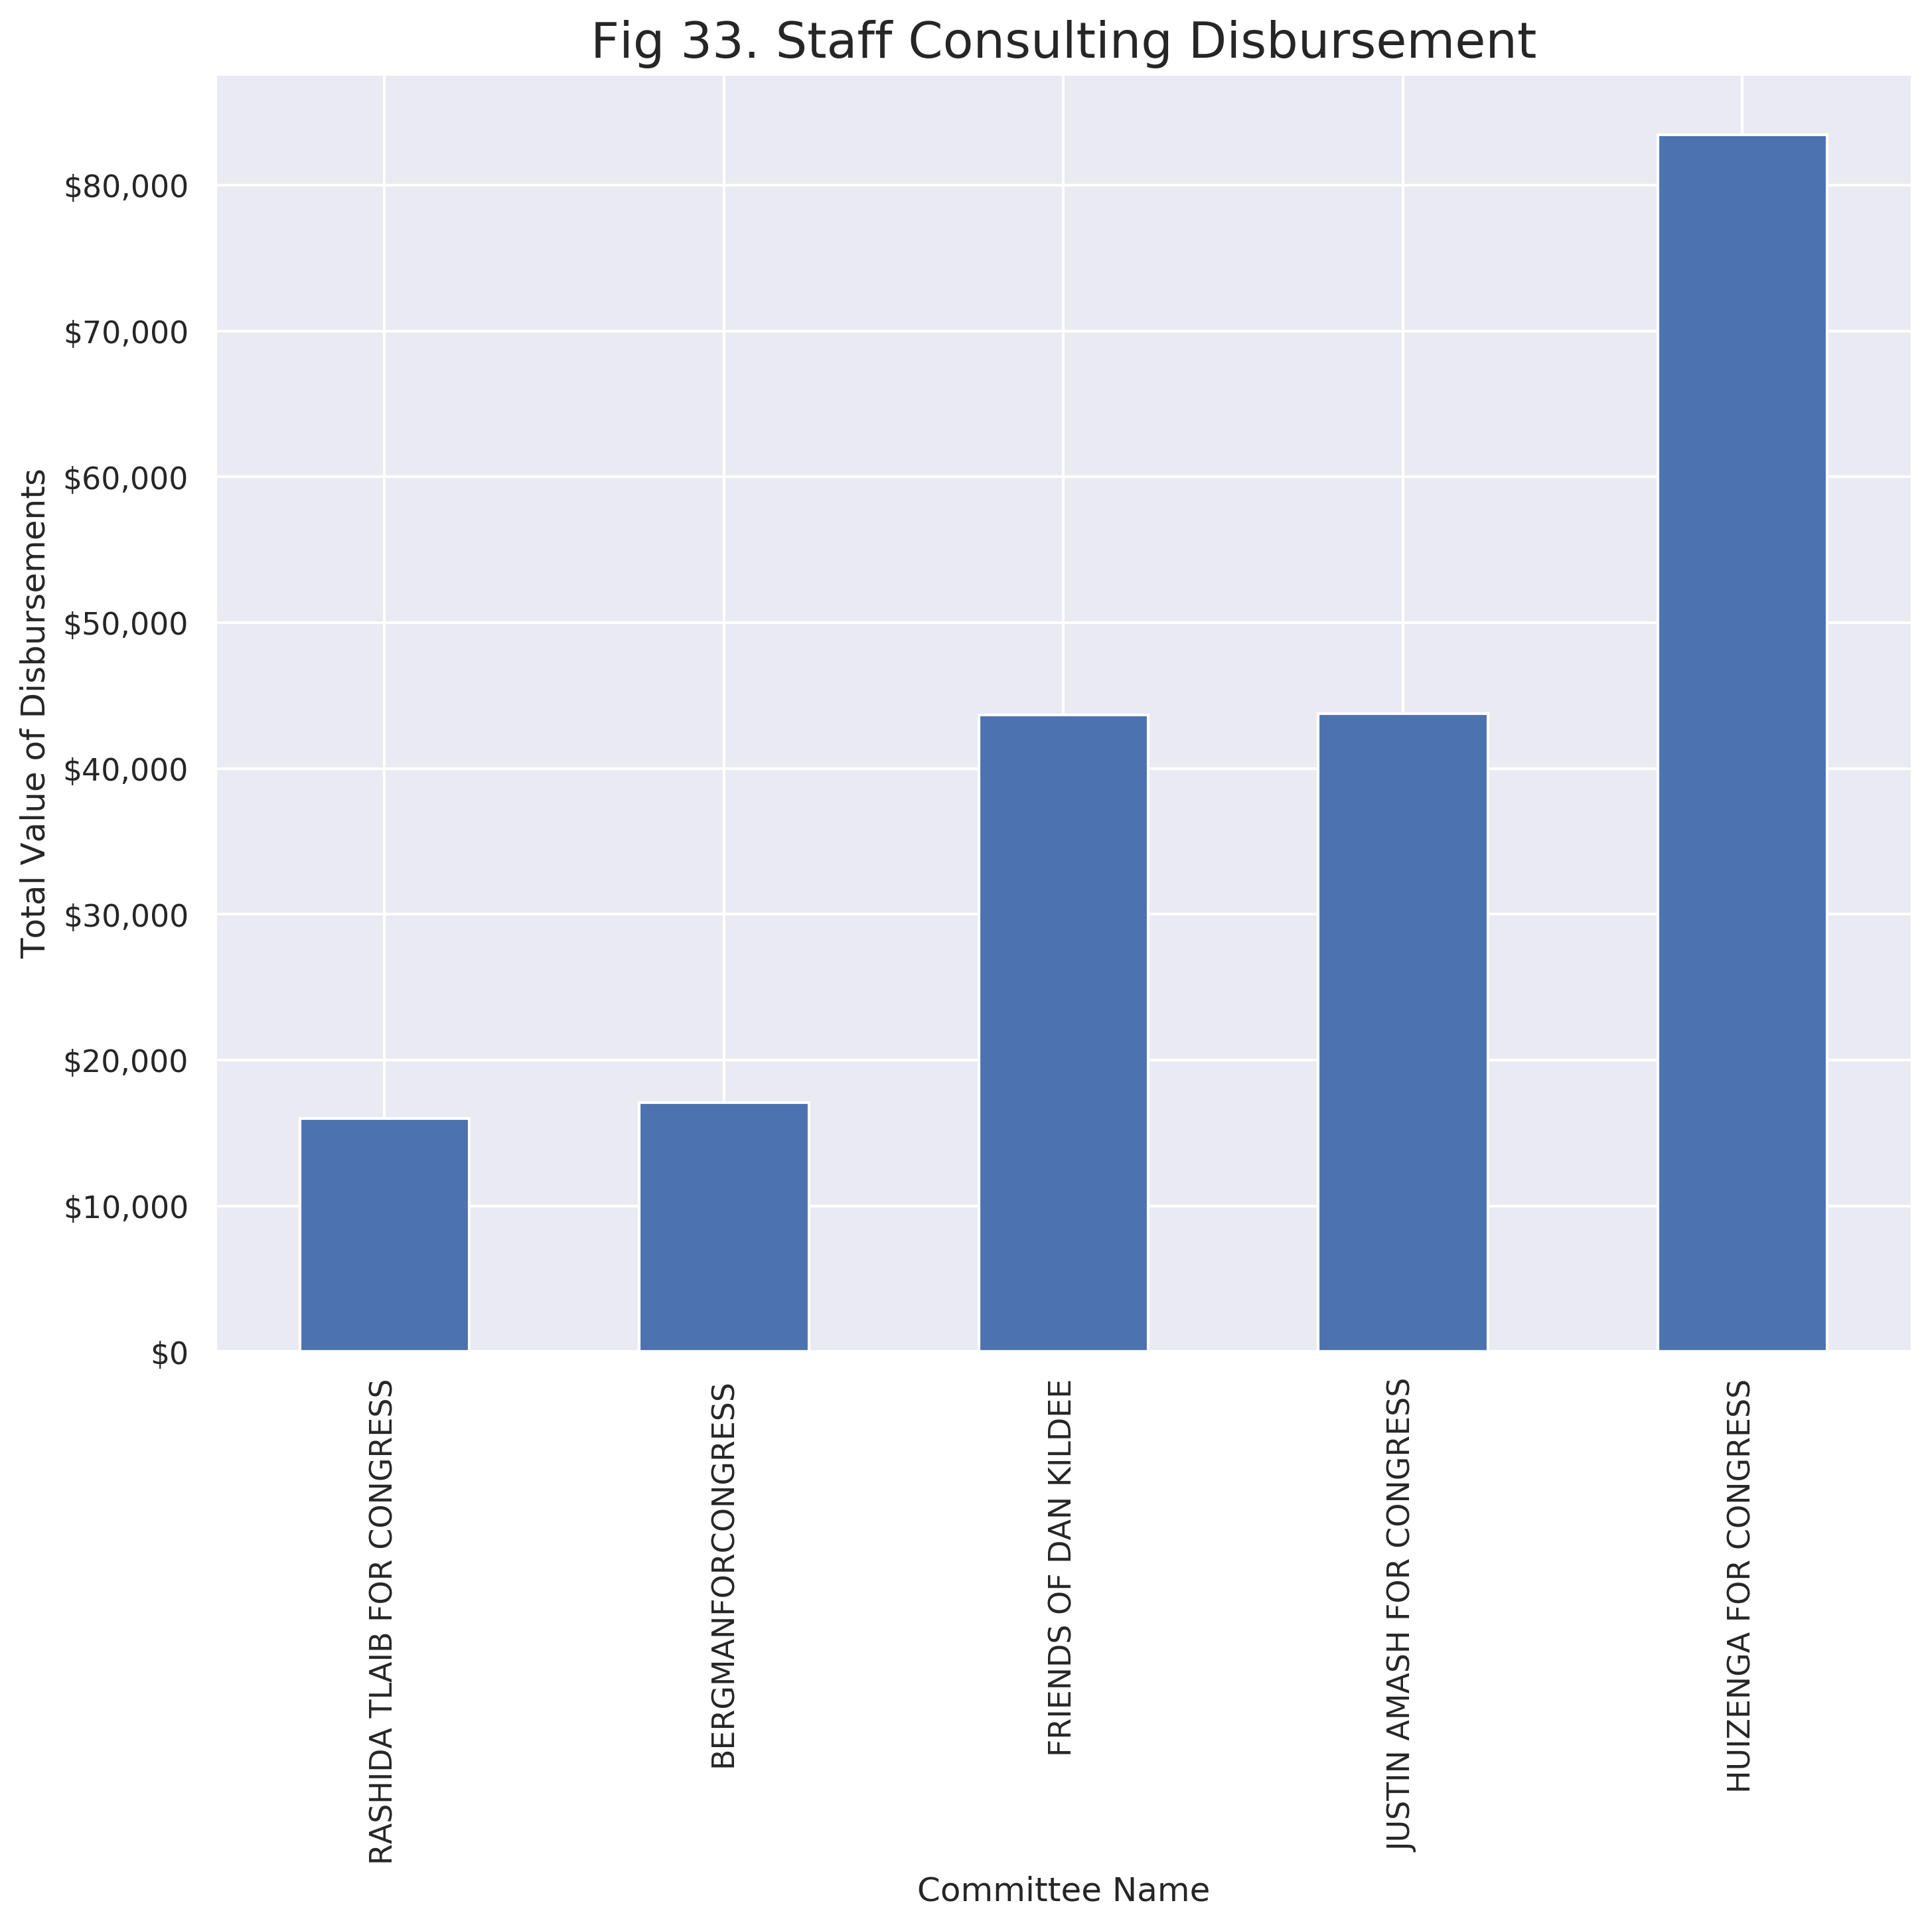

In [100]:
ax = _["disbursement_sum"].plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Staff Consulting Disbursement"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

### Staff consulting disbursement, Grouped by Committee Name with Full Disbursement Description

In [101]:
_ = consulting_df.groupby(['committee_name','disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name             disbursement_description                        
BERGMANFORCONGRESS         CAMPAIGN CONSULTING                         1   
                           FIELD CONSULTING                            6   
                           STRATEGY CONSULTING                         2   
FRIENDS OF DAN KILDEE      CONTRACT CONSULTING                         2   
                           FUNDRAISING CONSULTING                     14   
                           SOCIAL MEDIA CONSULTING                     1   
HUIZENGA FOR CONGRESS      CAMPAIGN CONSULTANT                        51   
                           CAMPAIGN CONSULTING                         3   
                           CONSULTING SERVICES                         4   
                           FIELD CONSULTANT                            1   
                           FIELD CONSULTING                           12   
                           FUNDRAISING CONSULTING                      8   
                           STRATEGY CONSULTING                        11   
JUSTIN AMASH FOR CONGRESS  ADMINISTRATIVE CONSULTING                  14   
RASHIDA TLAIB FOR CONGRESS FUNDRAISING CONSULTATION                    2   

                                                      disbursement_sum  
committee_name             disbursement_description                     
BERGMANFORCONGRESS         CAMPAIGN CONSULTING                 2000.00  
                           FIELD CONSULTING                   10095.00  
                           STRATEGY CONSULTING                 5000.00  
FRIENDS OF DAN KILDEE      CONTRACT CONSULTING                 3720.00  
                           FUNDRAISING CONSULTING             39166.00  
                           SOCIAL MEDIA CONSULTING              786.56  
HUIZENGA FOR CONGRESS      CAMPAIGN CONSULTANT                30837.98  
                           CAMPAIGN CONSULTING                 3000.00  
                           CONSULTING SERVICES                17354.10  
                           FIELD CONSULTANT                     500.00  
                           FIELD CONSULTING                    9055.00  
                           FUNDRAISING CONSULTING              8966.32  
                           STRATEGY CONSULTING                13750.00  
JUSTIN AMASH FOR CONGRESS  ADMINISTRATIVE CONSULTING          43749.66  
RASHIDA TLAIB FOR CONGRESS FUNDRAISING CONSULTATION           16000.00

### Staff consulting disbursement, Grouped by Recipient

Sorted by total disbursement sum.

In [102]:
_ = mileage_df.groupby(['recipient', 'committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  \
recipient              committee_name                                    
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS                   1   
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS                   1   
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                         1   
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                        5   
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS                    1   
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS                   2   
DEWITTE, JON           HUIZENGA FOR CONGRESS                         1   
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                        2   
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS                   2   
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                         2   
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                        13   
PATRICK, BRIAN         HUIZENGA FOR CONGRESS                        17   
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                       49   
RAJZER, STEPHEN        WALBERG FOR CONGRESS                         22   
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS                       13   
KOOIMAN, MATT          HUIZENGA FOR CONGRESS                        63   

                                                    disbursement_sum  
recipient              committee_name                                 
NORMAN, MELA           ELISSA SLOTKIN FOR CONGRESS             42.44  
CAALSKONOS, FRANCESCA  ELISSA SLOTKIN FOR CONGRESS             97.60  
RAFFERTY, PALMER       HUIZENGA FOR CONGRESS                  201.84  
BURDICK, CLIFF         MOOLENAAR FOR CONGRESS                 208.73  
POBUR, COLLEEN         HALEY STEVENS FOR CONGRESS             327.70  
GIRELLI, AUSTIN        ELISSA SLOTKIN FOR CONGRESS            370.00  
DEWITTE, JON           HUIZENGA FOR CONGRESS                  374.08  
RUSSELL, DAVID         MOOLENAAR FOR CONGRESS                 468.53  
LINDOW, HANNAH         ELISSA SLOTKIN FOR CONGRESS            576.86  
ROKUS, PHILIP          HUIZENGA FOR CONGRESS                 1747.13  
MCMANUS, MARLISS       HUIZENGA FOR CONGRESS                 8195.85  
PATRICK, BRIAN         HUIZENGA FOR CONGRESS                 8874.61  
BORTZ, ASHTON          MOOLENAAR FOR CONGRESS                9334.05  
RAJZER, STEPHEN        WALBERG FOR CONGRESS                 10410.20  
MACARTHUR, CHRISTOPHER MOOLENAAR FOR CONGRESS               12103.26  
KOOIMAN, MATT          HUIZENGA FOR CONGRESS                26659.14

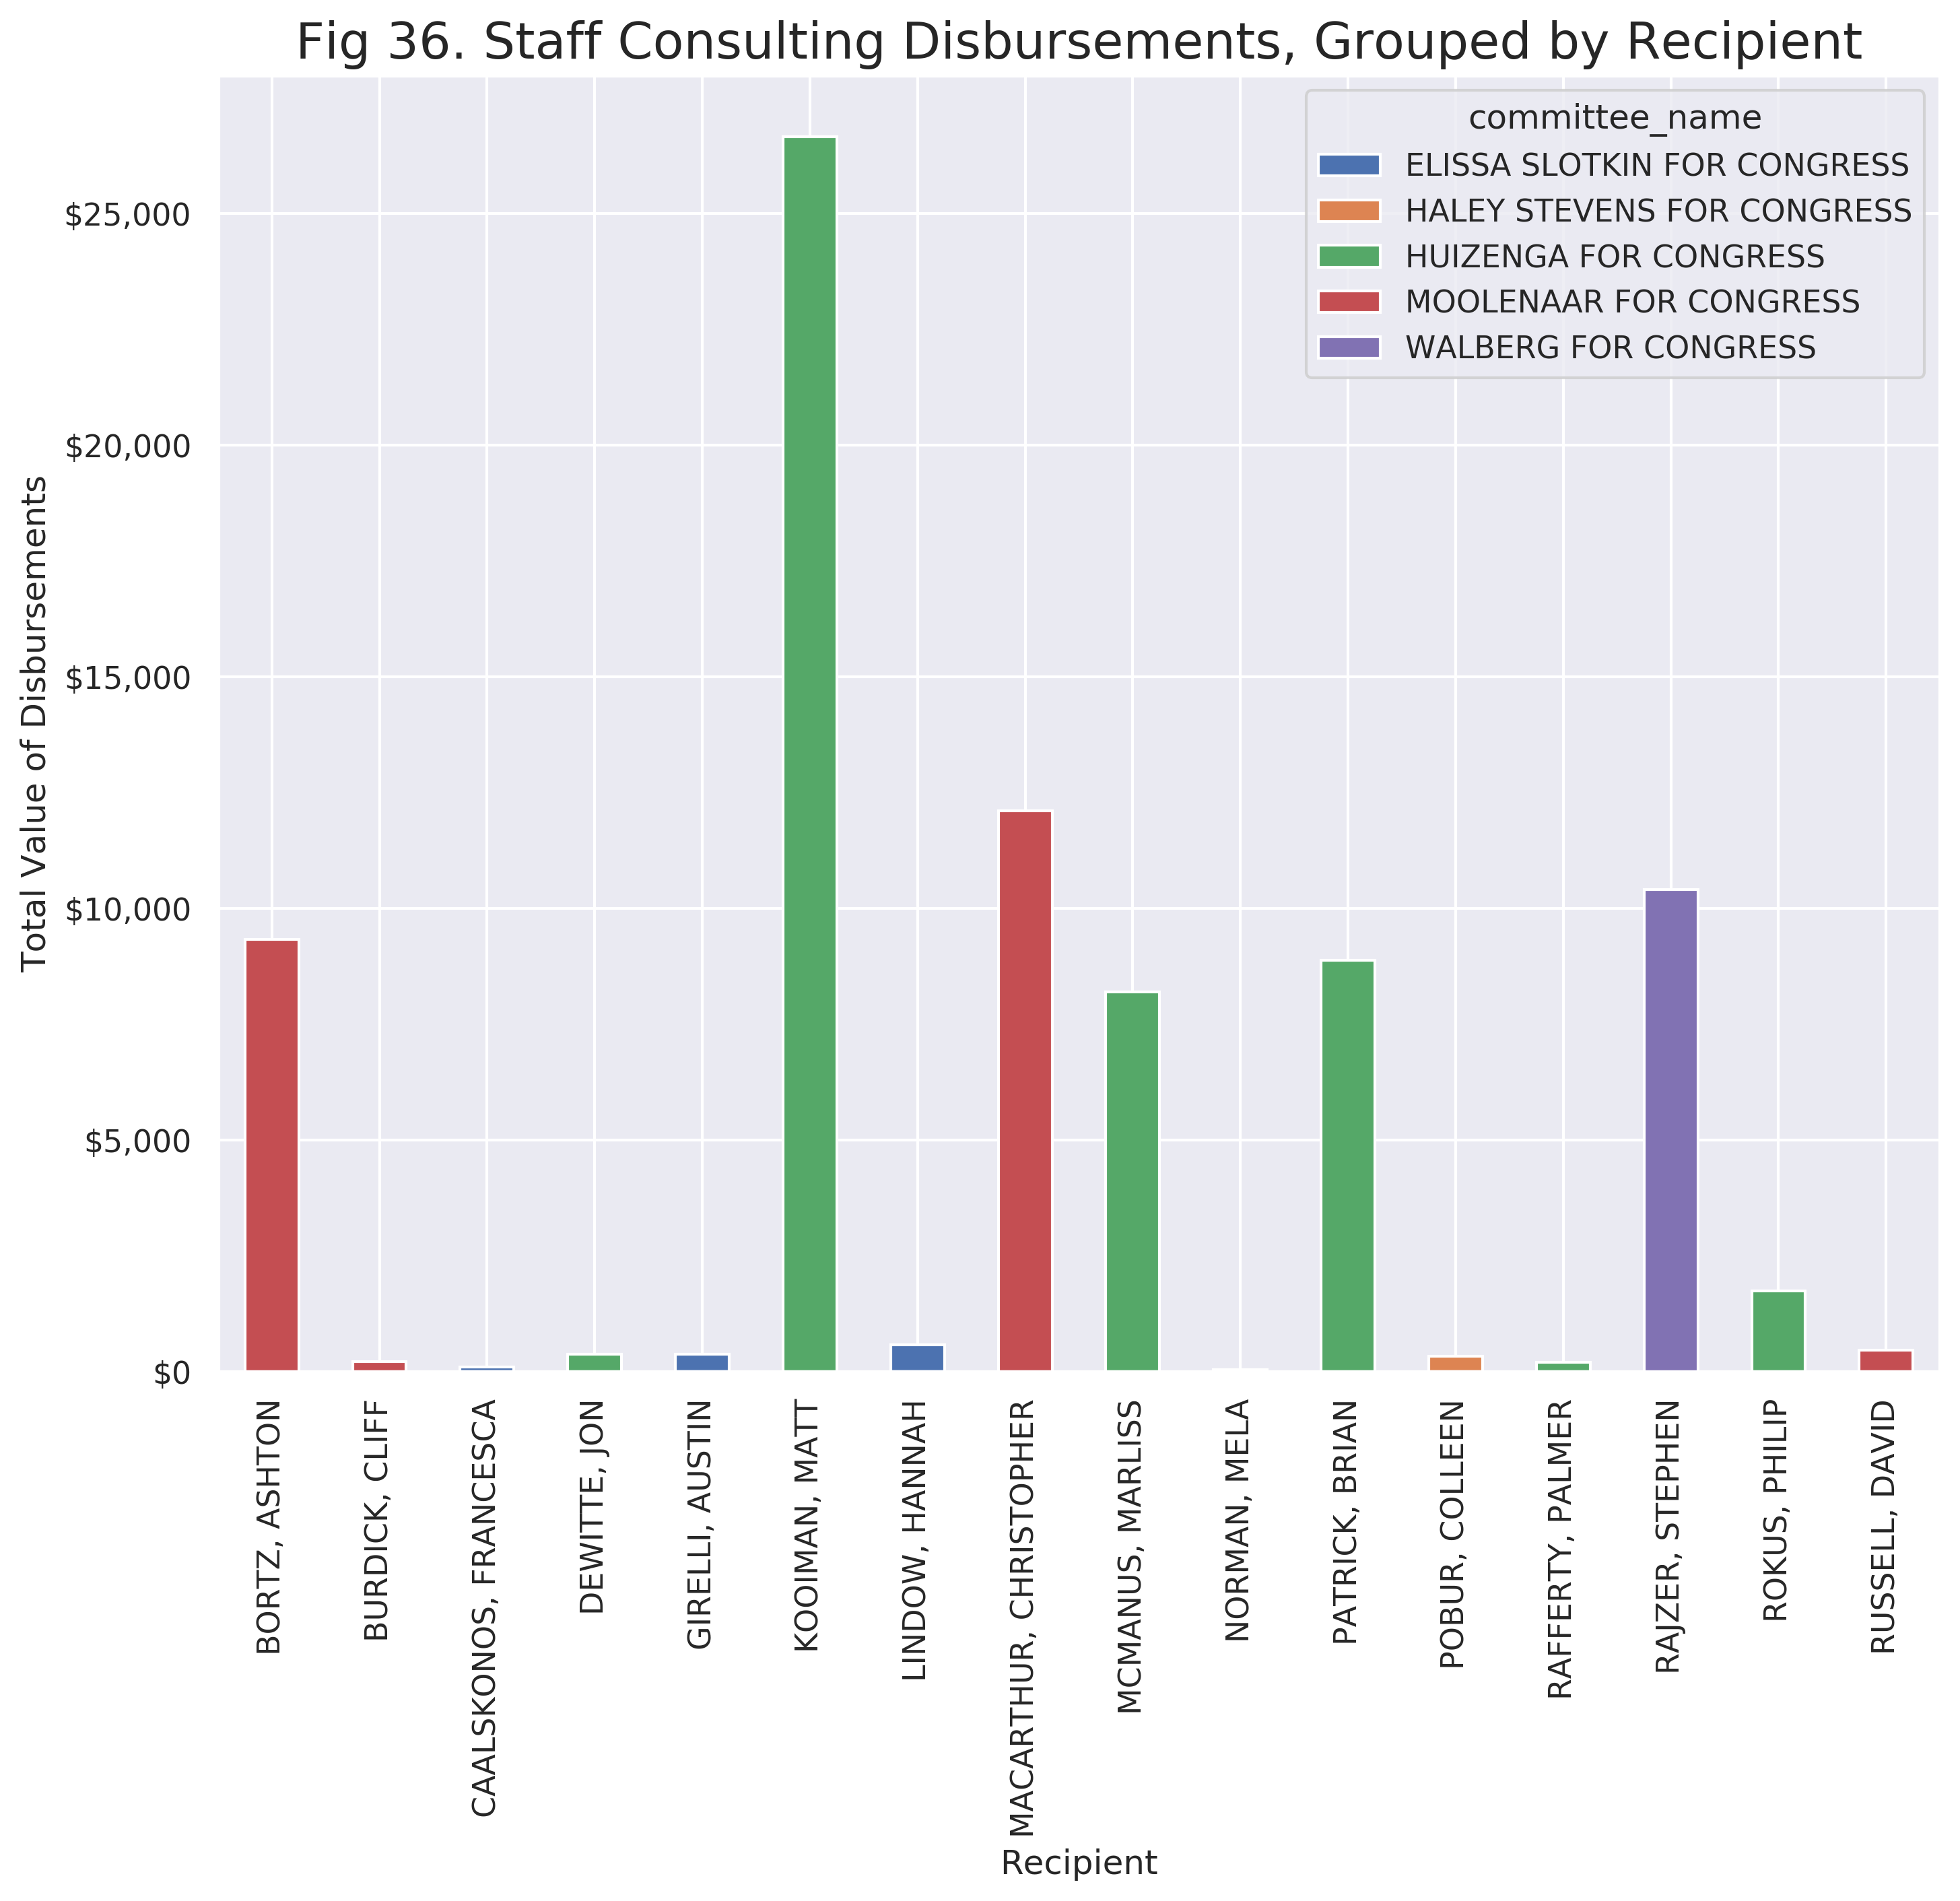

In [106]:
ax = _["disbursement_sum"].unstack().plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Recipient")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Staff Consulting Disbursements, Grouped by Recipient"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

## "Other", Non-Payroll.

What campaign staff gets reimbursed most for "Other" & what disbursement purposes does each compaign count as 'Other'.

In [107]:
df.disbursement_description = df.disbursement_description.apply(str)
non_payroll_other_df = non_payroll_df[
    non_payroll_df.disbursement_purpose_category == "OTHER"
]

### Non-Payroll Staff "OTHER" disbursements, Grouped by Committee Name

Sorted by total disbursement sum.

In [109]:
_ = non_payroll_other_df.groupby(['committee_name']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_.sort_values(by="disbursement_sum", inplace=True)
_

disbursement_count  disbursement_sum
committee_name                                                   
ANDY LEVIN FOR CONGRESS                       2            279.96
DEBBIE DINGELL FOR CONGRESS                   1            407.62
HALEY STEVENS FOR CONGRESS                    2           2103.26
ELISSA SLOTKIN FOR CONGRESS                  14           4513.47
WALBERG FOR CONGRESS                         35          13933.68
BERGMANFORCONGRESS                           21          20258.36
RASHIDA TLAIB FOR CONGRESS                    8          27398.08
MOOLENAAR FOR CONGRESS                       79          42751.85
JUSTIN AMASH FOR CONGRESS                    20          50186.83
FRIENDS OF DAN KILDEE                        23          54338.67
HUIZENGA FOR CONGRESS                       207         158406.78

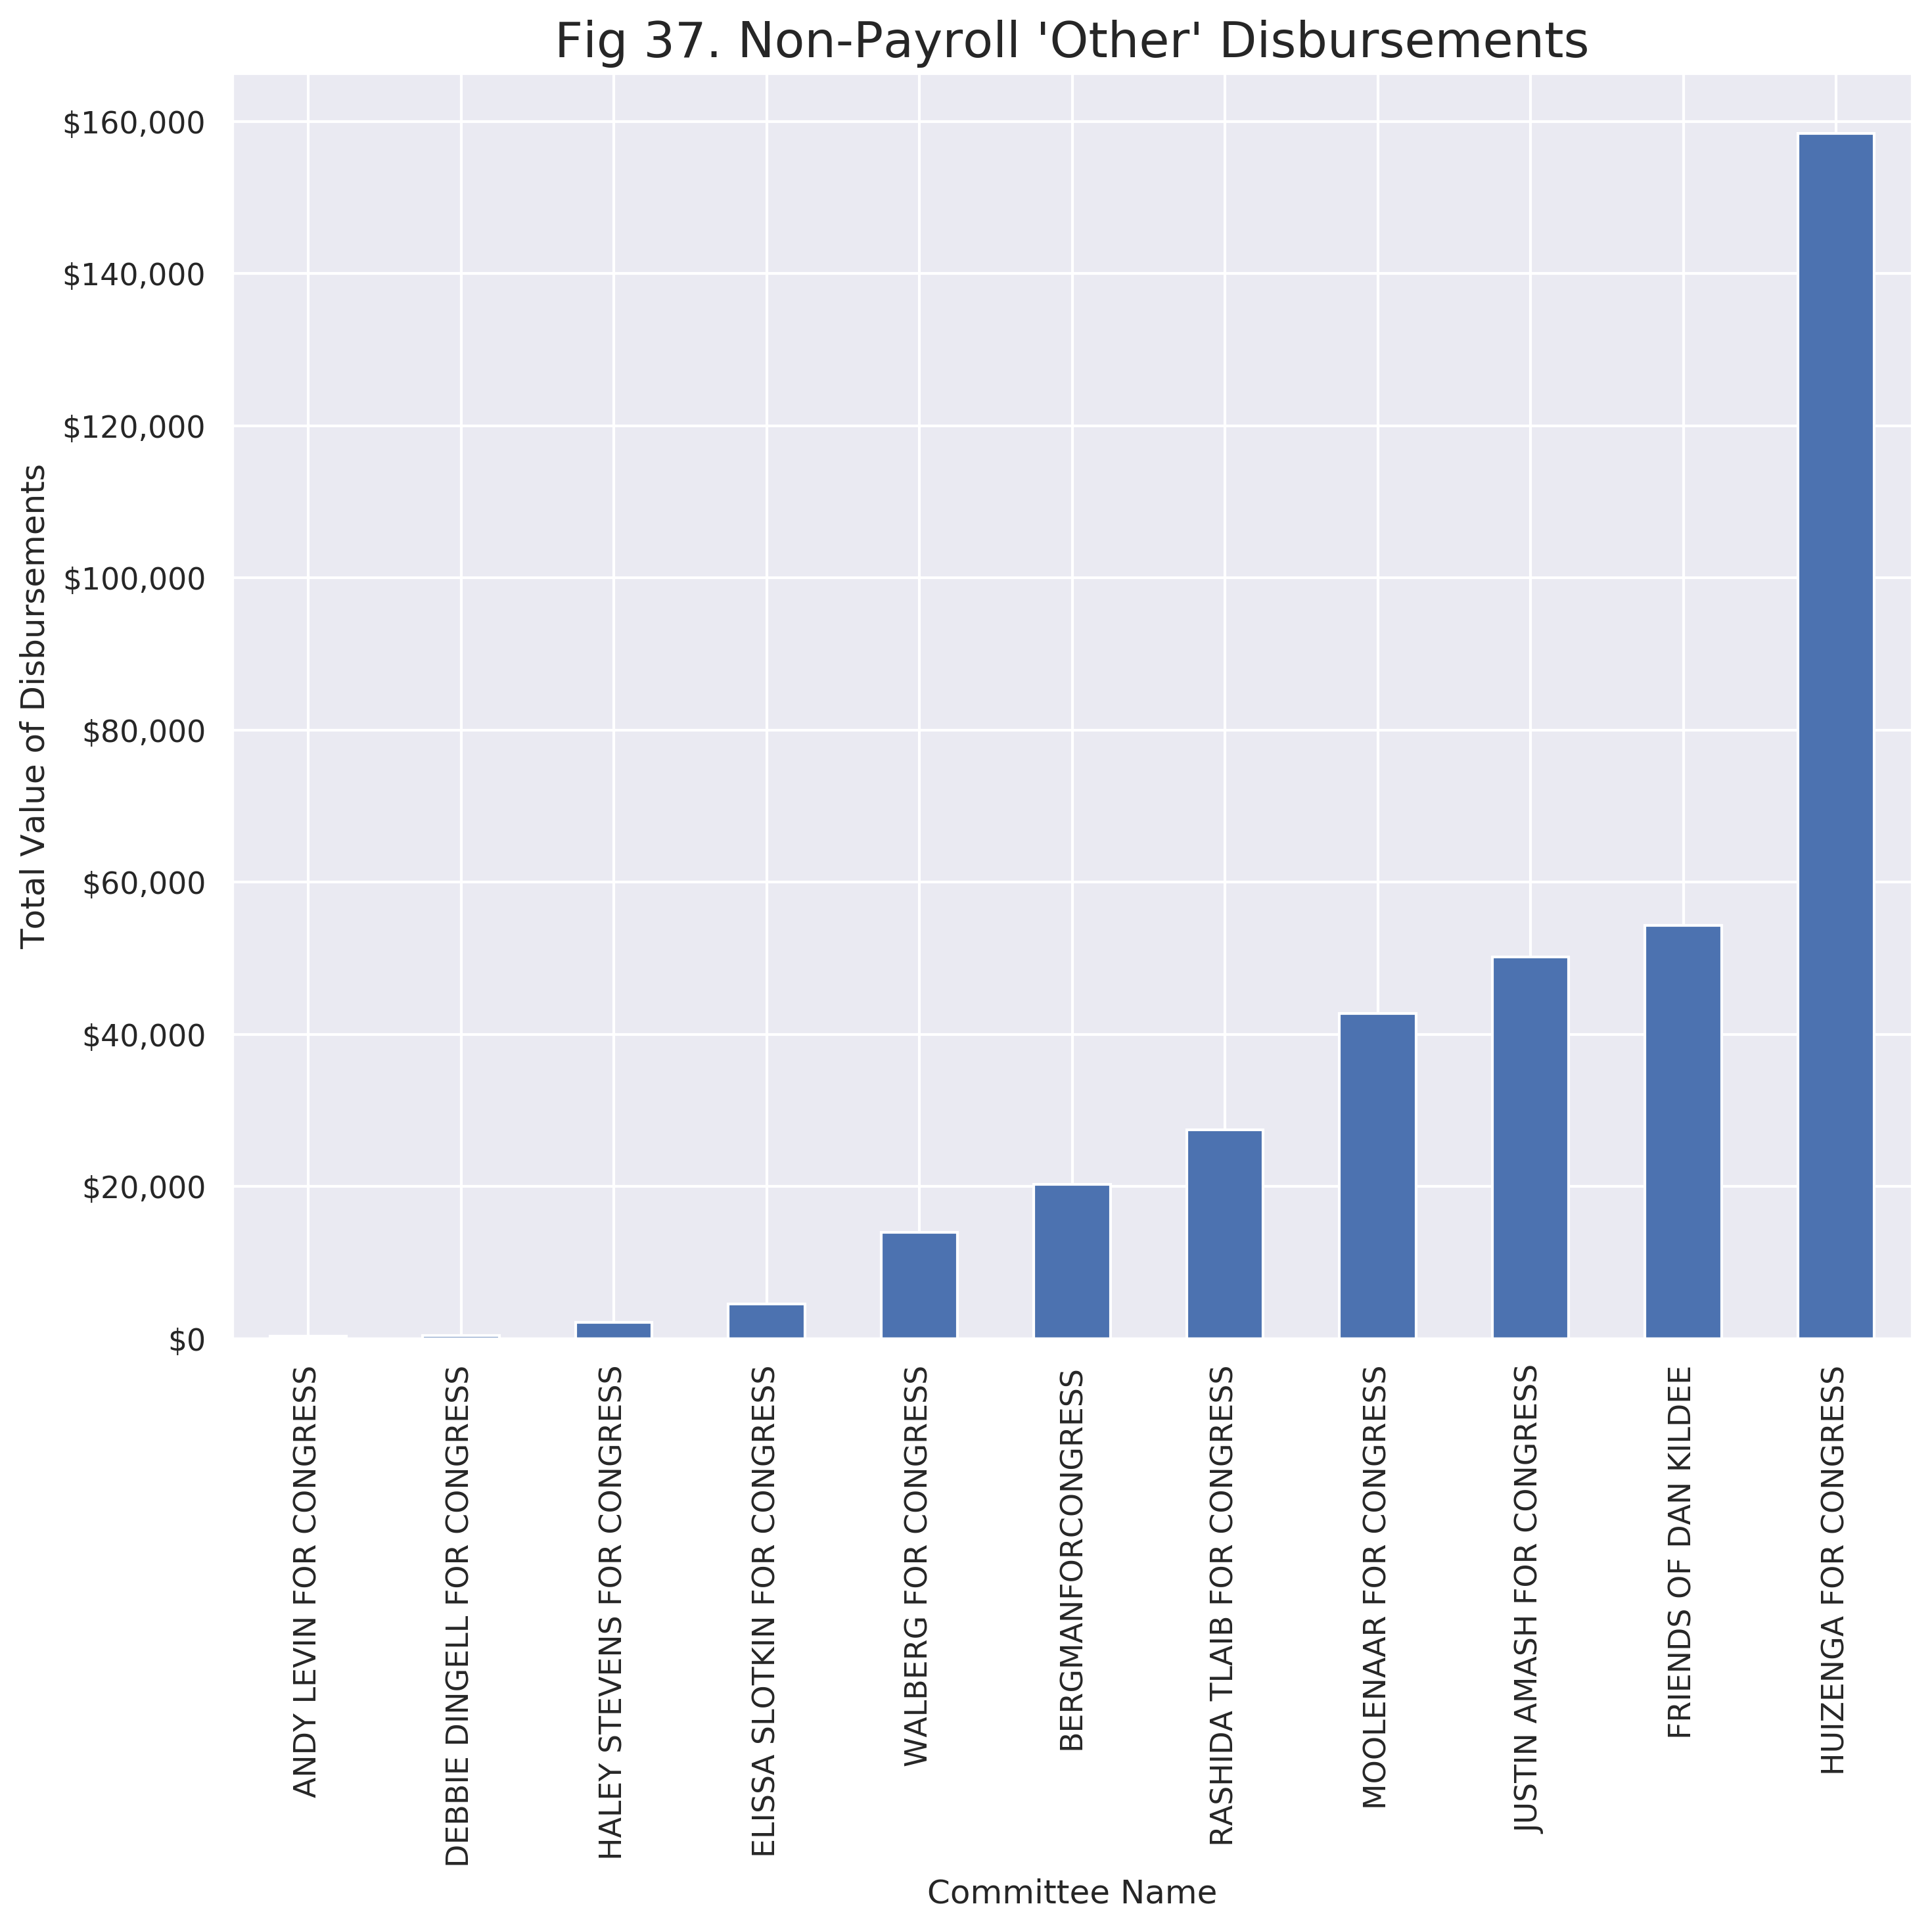

In [110]:
ax = _["disbursement_sum"].plot(kind='bar', stacked=True)
# Labels
plt.xlabel("Committee Name")
plt.ylabel("Total Value of Disbursements")
ax.yaxis.set_major_formatter(dollar_tick)
# Title & Save
fig_no+=1
title = f"Fig {fig_no}. Non-Payroll 'Other' Disbursements"
plt.title(title)
plt.savefig(f"{title}.png", transparent=False, bbox_inches='tight')

### Staff "other" disbursements, Grouped by Committee Name with Full Disbursement Description

In [111]:
_ = non_payroll_other_df.groupby(['committee_name','disbursement_description']).agg({"disbursement_amount": ["count", "sum"]})
_.columns = ["_".join(x) for x in _.columns.ravel()]
_.columns=[c.replace("_amount", "") for c in _.columns]
_

disbursement_count  \
committee_name              disbursement_description                                                 
ANDY LEVIN FOR CONGRESS     EVENT SUPPLIES                                                       1   
                            OFFICE SUPPLY REIMBURSEMENT                                          1   
BERGMANFORCONGRESS          CAMPAIGN CONSULTING                                                  1   
                            FIELD CONSULTING                                                     6   
                            NO ITEMIZATION NECESSARY                                             1   
                            SEE BELOW                                                            2   
                            SEE MEMO ENTRIES                                                     5   
                            SEE MEMO ENTRY                                                       4   
                            STRATEGY CONSULTING                                                  2   
DEBBIE DINGELL FOR CONGRESS REIMBURSEMENT                                                        1   
ELISSA SLOTKIN FOR CONGRESS MILEAGE REIMBURSEMENT                                                6   
                            REIMBURSEMENT                                                        4   
                            REIMBURSEMENT (VENDORS OVER $200 AGGREGATE BELOW)                    2   
                            REIMBURSEMENT (VENDORS THAT AGGREGATE OVER $200...                   1   
                            REIMBURSEMENT (VENDORS THAT AGGREGATE OVER $200...                   1   
FRIENDS OF DAN KILDEE       ADVANCE FOR PURCHASE OF FOOD FOR FUNDRAISER                          1   
                            CONTRACT CONSULTING                                                  2   
                            CONTRACT PROFESSIONAL SERVICES                                       1   
                            FUEL REIMBURSEMENT FOR CAMPAIGN APPEARANCES                          1   
                            FUNDRAISER SUPPLIES                                                  1   
                            FUNDRAISING CONSULTING                                              14   
                            FUNDRAISING EMPLOYEE                                                 1   
                            OFFICE SUPPLY REIMBURSEMENT                                          1   
                            SUPPLIES                                                             1   
HALEY STEVENS FOR CONGRESS  MILEAGE                                                              1   
                            REIMBURSEMENT - TRAVEL                                               1   
HUIZENGA FOR CONGRESS       ADMINISTRATION SERVICES                                              5   
                            CAMPAIGN BREAKFAST MEETING                                           1   
                            CAMPAIGN CONSULTANT                                                 51   
                            CAMPAIGN CONSULTING                                                  3   
                            CAMPAIGN EVENT: MILEAGE REIMBURSEMENT                                1   
                            CONSULTING SERVICES                                                  4   
                            FIELD CONSULTANT                                                     1   
                            FIELD CONSULTING                                                    12   
                            FUNDRAISING CONSULTING                                               8   
                            LABOR FOR CAMPAIGN WORKER                                            1   
                            MILEAGE REIMBURSEMENT                                               66   
                            PERFORMANCE BONUS                                                    1   
